# 1 Preliminary Data Processing

## 1.1 Loading the Data
We begin by loading the dataset and inspecting its structure. This will allow us to understand the types of variables available and how they relate to the target variable `loan_default`.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import pandas as pd

# Load the dataset
loan_df = pd.read_csv('/Users/dave.john.98/Desktop/APAN/Fall 24/Anomaly Detection/Week 3 & 4/XYZloan_default_selected_vars.csv')

# Display the first few rows to understand the data structure
loan_df.head()

,Unnamed: 0.1,Unnamed: 0,id,loan_default,AP001,AP002,AP003,AP004,AP005,AP006,...,CD162,CD164,CD166,CD167,CD169,CD170,CD172,CD173,MB005,MB007
0,0,1,1,1,31,2,1,12,2017/7/6 10:21,ios,...,13.0,13.0,0.0,0.0,1449.0,1449.0,2249.0,2249.0,7.0,IPHONE7
1,1,2,2,0,27,1,1,12,2017/4/6 12:51,h5,...,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,NaN,WEB
2,2,3,3,0,33,1,4,12,2017/7/1 14:11,h5,...,3.0,2.0,33.0,0.0,33.0,0.0,143.0,110.0,8.0,WEB
3,3,4,4,0,34,2,4,12,2017/7/7 10:10,android,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,OPPO
4,4,5,5,0,47,2,1,12,2017/7/6 14:37,h5,...,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,NaN,WEB


## 1.2 Selecting Relevant Columns
Since the dataset contains many columns, we will focus on the 15 variables required for this assignment along with the target variable `loan_default`. These variables are:
- AP001, AP003, AP008
- CR009, CR015, CR019
- PA022, PA023, PA029
- TD001, TD005, TD006, TD009, TD010, TD014


In [3]:
# Columns of interest
selected_columns = [
    'loan_default', 'AP001', 'AP003', 'AP008', 'CR009', 'CR015', 'CR019',
    'PA022', 'PA023', 'PA029', 'TD001', 'TD005', 'TD006', 'TD009', 'TD010', 'TD014'
]

# Filter the dataset to include only the selected columns
filtered_data = loan_df[selected_columns]

# Display the first few rows of the filtered dataset
filtered_data.head()


,loan_default,AP001,AP003,AP008,CR009,CR015,CR019,PA022,PA023,PA029,TD001,TD005,TD006,TD009,TD010,TD014
0,1,31,1,3,35807,4,2,-1.0,-1.0,-98.0,1,4,1,5,1,2
1,0,27,1,4,7254,6,11,-1.0,-1.0,-98.0,2,3,1,3,1,2
2,0,33,4,2,30377,2,3,-1.0,-1.0,-98.0,2,4,1,5,1,1
3,0,34,4,5,0,5,8,-1.0,-1.0,-98.0,0,0,0,0,0,1
4,0,47,1,4,0,6,11,-99.0,-99.0,-99.0,2,2,1,2,1,1


## 1.3 Checking for Missing Values
It is essential to check for any missing values in our filtered dataset before proceeding with analysis. This will help us decide if any imputation or handling of missing data is required.


In [4]:
# Check for missing values in the filtered dataset
missing_values = filtered_data.isnull().sum()

# Display the count of missing values for each column
missing_values


loan_default      0
AP001             0
AP003             0
AP008             0
CR009             0
CR015             0
CR019             0
PA022           381
PA023           381
PA029           381
TD001             0
TD005             0
TD006             0
TD009             0
TD010             0
TD014             0
dtype: int64

### Observations on Missing Values

Upon checking for missing values, we find that the variables `PA022`, `PA023`, and `PA029` contain 381 missing values each. All other variables, including our target variable `loan_default`, have no missing values. We will consider the impact on the analysis and how to impute / classify these values. Further steps will be taken based on the importance of these variables in the subsequent EDA.


## 1.4 Data Types and Basic Information
To better understand the structure of our filtered dataset, we will examine the data types of each variable and provide basic statistics. This helps in identifying which variables are numerical or categorical and in planning appropriate visualizations and transformations during EDA.


In [5]:
# Display data types and basic information
filtered_data.info()

# Display summary statistics for numerical columns
filtered_data.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   loan_default  80000 non-null  int64  
 1   AP001         80000 non-null  int64  
 2   AP003         80000 non-null  int64  
 3   AP008         80000 non-null  int64  
 4   CR009         80000 non-null  int64  
 5   CR015         80000 non-null  int64  
 6   CR019         80000 non-null  int64  
 7   PA022         79619 non-null  float64
 8   PA023         79619 non-null  float64
 9   PA029         79619 non-null  float64
 10  TD001         80000 non-null  int64  
 11  TD005         80000 non-null  int64  
 12  TD006         80000 non-null  int64  
 13  TD009         80000 non-null  int64  
 14  TD010         80000 non-null  int64  
 15  TD014         80000 non-null  int64  
dtypes: float64(3), int64(13)
memory usage: 9.8 MB


,loan_default,AP001,AP003,AP008,CR009,CR015,CR019,PA022,PA023,PA029,TD001,TD005,TD006,TD009,TD010,TD014
count,80000.000000,80000.000000,80000.000000,80000.000000,8.000000e+04,80000.000000,80000.000000,79619.000000,79619.000000,79619.000000,80000.000000,80000.000000,80000.000000,80000.00000,80000.000000,80000.000000
mean,0.193600,31.706913,2.014925,3.117200,3.518711e+04,4.924750,6.199038,19.298811,14.828822,-42.407356,1.986962,3.593037,1.345700,5.40600,2.020812,2.603662
std,0.395121,7.075070,1.196806,1.306335,6.359684e+04,1.094305,3.359354,39.705478,37.009374,97.006168,1.807445,2.799570,1.413362,4.02311,1.973988,2.505840
min,0.000000,20.000000,1.000000,1.000000,0.000000e+00,2.000000,1.000000,-99.000000,-99.000000,-99.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,0.000000,27.000000,1.000000,2.000000,4.700000e+03,5.000000,3.000000,-1.000000,-1.000000,-98.000000,1.000000,2.000000,0.000000,3.00000,1.000000,1.000000
50%,0.000000,30.000000,1.000000,3.000000,1.728500e+04,5.000000,5.000000,-1.000000,-1.000000,-98.000000,2.000000,3.000000,1.000000,4.00000,2.000000,2.000000
75%,0.000000,35.000000,3.000000,4.000000,4.075000e+04,6.000000,10.000000,41.000000,14.000000,26.000000,3.000000,5.000000,2.000000,7.00000,3.000000,4.000000
max,1.000000,56.000000,6.000000,5.000000,1.420300e+06,6.000000,12.000000,448.000000,448.000000,2872.000000,20.000000,24.000000,21.000000,46.00000,35.000000,43.000000


Before splitting the dataset into training and test sets, we categorize the features as either `categorical_cols` or `continuous_cols`. This classification is based on the number of unique values in each column, with categorical columns having fewer unique values than a predefined threshold.

In [6]:
categorical_cols = ['AP001', 'AP003', 'AP008', 'CR015', 'CR019', 'PA022', 'PA023', 'TD001', 'TD005', 'TD006', 'TD009', 'TD010', 'TD014']
continuous_cols = ['CR009', 'PA029']

## 1.5 Splitting the Dataset into Train and Test Sets
To prepare for analysis and model evaluation, we split the dataset into training and testing sets. We will allow `train_test_split` to determine the sizes automatically. The `random_state` is set to 0 for reproducibility, and we use `stratify` to maintain the distribution of the target variable `loan_default`.


In [7]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (Y)
X = filtered_data.drop('loan_default', axis=1)
Y = filtered_data['loan_default']

# Split the data into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=0, stratify=Y)

# Display the shapes of the train and test sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)


X_train shape: (60000, 15)
X_test shape: (20000, 15)
Y_train shape: (60000,)
Y_test shape: (20000,)


# 2. EDA for Variables - Relationship with `loan_default`

### 2.1 Distribution of Categorical Variables
To understand the behavior of categorical variables in `X_train`, we use count plots to visualize their distributions. Additionally, we explore how these variables interact with the target variable `loan_default`.

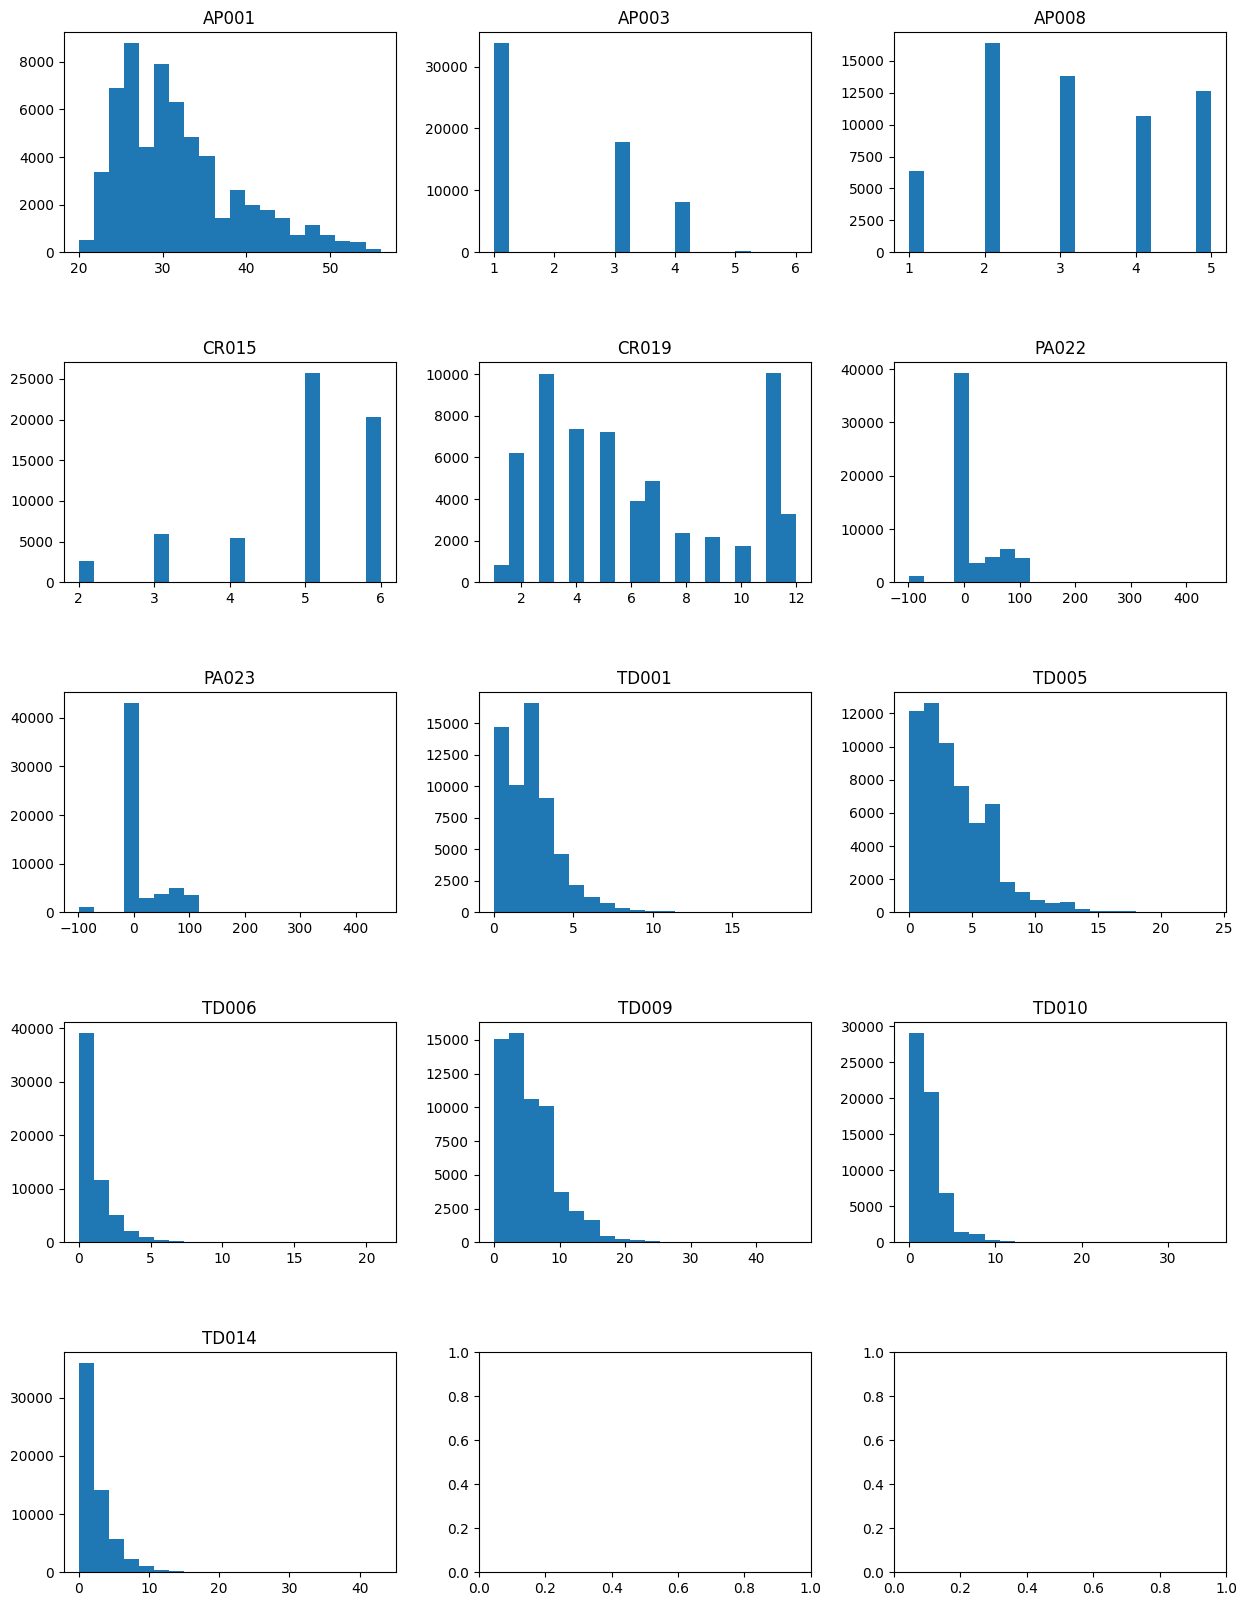

In [8]:
def plot_histograms(df, col_strings):
    %matplotlib inline
    fig, axs = plt.subplots(5,3, figsize=(15, 20), facecolor='w', edgecolor='k')
    fig.subplots_adjust(hspace = .5, wspace=.25)
    
    axs = axs.ravel()
    
    for i, col in enumerate(col_strings):
        axs[i].hist(df[col], bins=20)
        axs[i].set_title(col)

    plt.show()

plot_histograms(X_train, categorical_cols)


We will analyze the categorical variables in `categorical_cols` to understand their distribution and relationship with `loan_default`. The function created below will calculate the percentage of records in each category and the average default rate for each category.


In [9]:
def analyze_categorical_variable(X, Y, variable):
    
    # Combine X and Y into a single DataFrame for analysis
    df = X.copy()
    df['loan_default'] = Y
    
    # Calculate count and average default for each category
    summary = df.groupby(variable).agg(
        loan_count=(variable, 'count'),
        avg_default=('loan_default', 'mean')
    )
    
    # Calculate the percentage of loans in each category
    summary['percent_loans'] = (summary['loan_count'] / df.shape[0]) * 100
    
    return summary

# Example usage for the first categorical variable
variable_summary = analyze_categorical_variable(X_train, Y_train, categorical_cols[0])
print(f"\nAnalysis for {categorical_cols[0]}:")
print(variable_summary)



Analysis for AP001:
       loan_count  avg_default  percent_loans
AP001                                        
20             80     0.237500       0.133333
21            454     0.275330       0.756667
22           1201     0.208993       2.001667
23           2186     0.207685       3.643333
24           3245     0.197535       5.408333
25           3665     0.209823       6.108333
26           4100     0.203902       6.833333
27           4694     0.215168       7.823333
28           4404     0.199591       7.340000
29           3828     0.191745       6.380000
30           4070     0.189681       6.783333
31           3557     0.193984       5.928333
32           2770     0.186643       4.616667
33           2571     0.186309       4.285000
34           2249     0.188084       3.748333
35           2190     0.181279       3.650000
36           1852     0.186285       3.086667
37           1428     0.167367       2.380000
38           1365     0.180952       2.275000
39           


To better understand the distribution and relationship of each categorical variable with `loan_default`, we plot:
1. A bar plot showing the percentage of records in each category.
2. A line plot overlaid to display the average default rate in each category.


In [10]:
def plot_categorical_analysis(summary, variable):
    
    fig, ax1 = plt.subplots(figsize=(10, 6))

    # Ensure the x values are strings
    x_vals = summary.index.astype(str)

    # Bar plot for percentage of records in each category
    color = 'tab:blue'
    ax1.set_xlabel(variable)
    ax1.set_ylabel('Percent of Loans', color=color)
    ax1.bar(summary.index, summary['percent_loans'], color=color, alpha=0.6, label='Percent of Loans')
    ax1.tick_params(axis='y', labelcolor=color)

    # Secondary y-axis for average default rate
    ax2 = ax1.twinx()
    color = 'tab:red'
    ax2.set_ylabel('Average Default Rate', color=color)
    ax2.plot(summary.index, summary['avg_default'], color=color, marker='o', label='Average Default Rate')
    ax2.tick_params(axis='y', labelcolor=color)

    # Title and labels
    plt.title(f'Distribution and Average Default Rate for {variable}')
    fig.tight_layout()
    plt.show()


### Analyzing `AP001` (Applicant Age)
`AP001` represents the age of the loan applicant. Age is often a crucial factor in determining creditworthiness, as it may correlate with an individual's financial stability, employment status, and ability to repay loans. Understanding how age influences the probability of default will help in assessing its importance in predictive modeling.


In [11]:
# Generate summary table for `AP001`
variable_summary = analyze_categorical_variable(X_train, Y_train, 'AP001')
print(f"\nAnalysis for AP001:")
print(variable_summary)


Analysis for AP001:
       loan_count  avg_default  percent_loans
AP001                                        
20             80     0.237500       0.133333
21            454     0.275330       0.756667
22           1201     0.208993       2.001667
23           2186     0.207685       3.643333
24           3245     0.197535       5.408333
25           3665     0.209823       6.108333
26           4100     0.203902       6.833333
27           4694     0.215168       7.823333
28           4404     0.199591       7.340000
29           3828     0.191745       6.380000
30           4070     0.189681       6.783333
31           3557     0.193984       5.928333
32           2770     0.186643       4.616667
33           2571     0.186309       4.285000
34           2249     0.188084       3.748333
35           2190     0.181279       3.650000
36           1852     0.186285       3.086667
37           1428     0.167367       2.380000
38           1365     0.180952       2.275000
39           

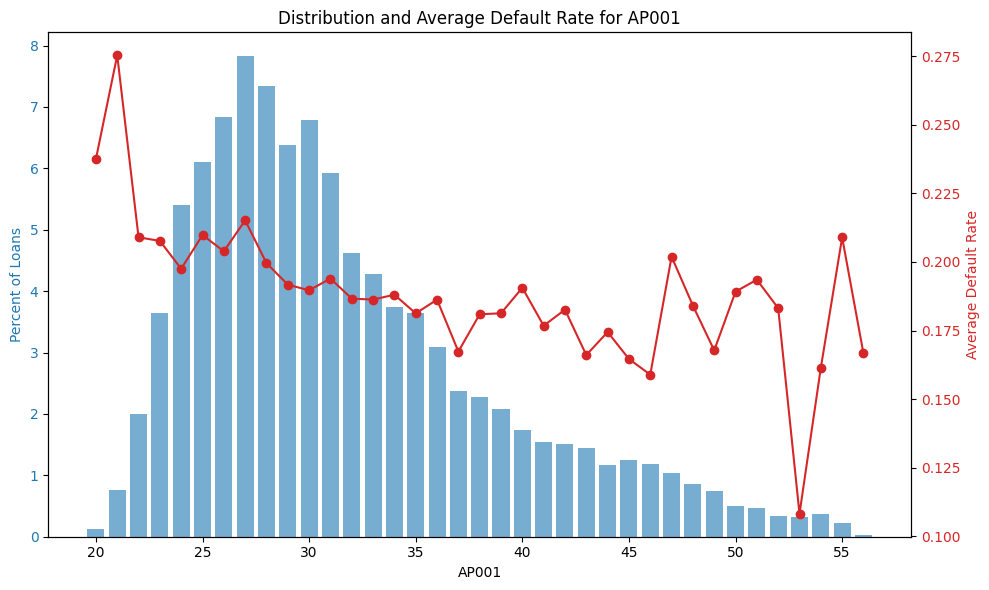

In [12]:
# Visualize the distribution and default rate for `AP001`
plot_categorical_analysis(variable_summary, 'AP001')

### Takeaways for `AP001` (Applicant Age)
1. **Distribution of Records**: The blue bars indicate that the highest concentration of applicants falls between ages 25-35, with a peak around age 27. The distribution decreases gradually for older age groups.
2. **Default Rate Trends**: The red line shows that the default rate generally declines as the age increases, with some fluctuations. Younger applicants (early 20s) have higher default rates, peaking around age 21. As the age progresses, the average default rate tends to stabilize around 0.17-0.20.
3. **Notable Fluctuations**: While the trend generally decreases, there are occasional spikes, particularly for ages around 45-50, where the default rate briefly increases. This could indicate specific risk factors associated with those age groups.
4. **Insights for Modeling**: The variable `AP001` shows that younger age groups tend to have a higher likelihood of default, which could make age a useful feature for predictive modeling.

In summary, `AP001` has a meaningful relationship with `loan_default`, as the default rate varies noticeably across age groups. This relationship should be explored further during feature engineering and modeling.


### Analyzing `AP003` (Education Code)
`AP003` represents the education code of the loan applicant. Education level is a crucial factor in assessing creditworthiness, as it may influence financial stability, employment status, and ability to repay loans. Understanding the relationship between education level and default rate will help in predictive modeling.


In [13]:
# Generate summary table for `AP003`
variable_summary = analyze_categorical_variable(X_train, Y_train, 'AP003')
print(f"\nAnalysis for AP003:")
print(variable_summary)


Analysis for AP003:
       loan_count  avg_default  percent_loans
AP003                                        
1           33852     0.220017      56.420000
3           17811     0.174780      29.685000
4            8162     0.128155      13.603333
5             165     0.054545       0.275000
6              10     0.000000       0.016667


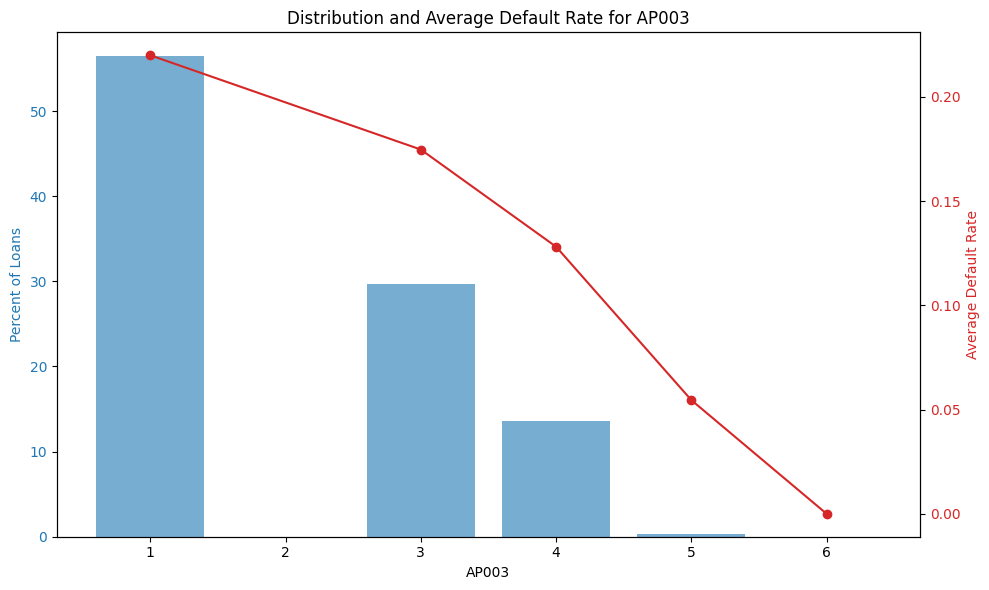

In [14]:
# Visualize the distribution and default rate for `AP003`
plot_categorical_analysis(variable_summary, 'AP003')


### Takeaways for `AP003` (Education Code)
1. **Distribution of Records**: The distribution of loans is concentrated in category `1`, with more than half of the records. The rest of the categories (`3`, `4`, `5`, and `6`) have significantly fewer records, with category `5` and `6` having a very small proportion.
2. **Default Rate Trends**: There is a clear downward trend in the default rate as the education code increases. Category `1` has the highest default rate, while the default rate for categories `5` and `6` is almost negligible. This suggests that higher education levels (assuming higher codes represent higher education) are associated with a lower probability of default.
3. **Insights for Modeling**: The significant differences in default rates across categories suggest that `AP003` can serve as an important predictor for modeling `loan_default`. Lower education codes are linked to a higher likelihood of default, highlighting the predictive value of this feature.

In summary, `AP003` exhibits a strong relationship with `loan_default`, indicating its potential utility in credit risk modeling.


### Analyzing `AP008` (IP City vs. Application City)
`AP008` is a flag indicating whether the applicant's IP city is different from their application city. A mismatch between these cities could be an indicator of potential risk, fraud, or applicant behavior, and it is important to understand how this affects the probability of default.


In [15]:
# Generate summary table for `AP008`
variable_summary = analyze_categorical_variable(X_train, Y_train, 'AP008')
print(f"\nAnalysis for AP008:")
print(variable_summary)



Analysis for AP008:
       loan_count  avg_default  percent_loans
AP008                                        
1            6395     0.170602      10.658333
2           16419     0.181497      27.365000
3           13818     0.192068      23.030000
4           10697     0.211181      17.828333
5           12671     0.207718      21.118333


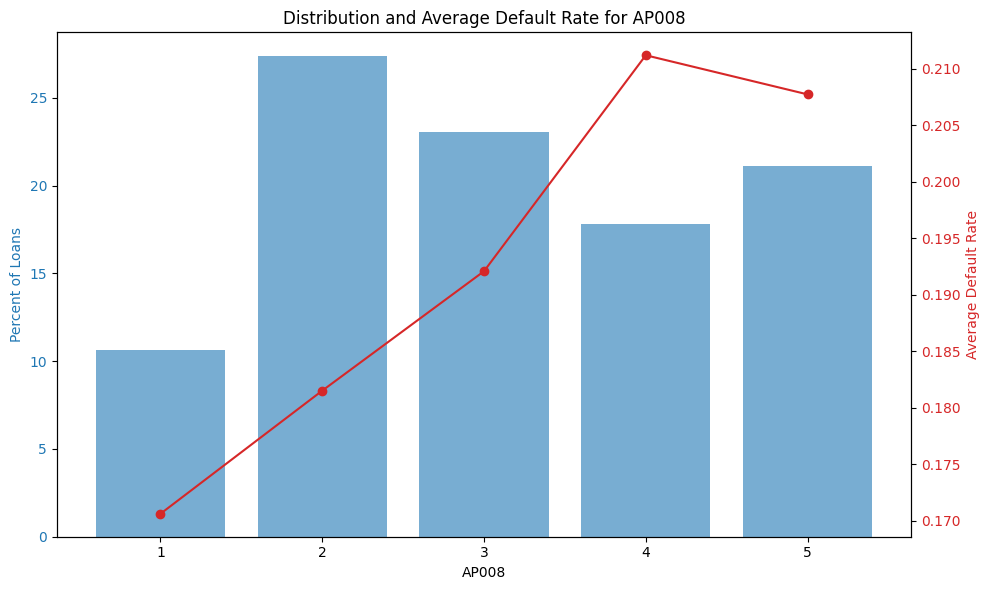

In [16]:
# Visualize the distribution and default rate for `AP008`
plot_categorical_analysis(variable_summary, 'AP008')


### Takeaways for `AP008` (IP City vs. Application City)
1. **Distribution of Records**: The distribution of records is spread across the different categories, with category `2` having the highest percentage of loans, followed by `3`. Category `1` has a relatively lower proportion, indicating fewer cases where the IP city might differ significantly from the application city.
2. **Default Rate Trends**: The default rate (red line) increases as the category moves from `1` to `5`. This suggests that as the mismatch between IP city and application city becomes more prominent (potentially indicated by higher values in `AP008`), the likelihood of default also increases.
3. **Insights for Modeling**: The positive correlation between the categories of `AP008` and the default rate suggests that this feature has predictive power. The higher default rates in categories `3` to `5` indicate a potential risk factor associated with inconsistencies between the applicant's IP city and their application city.

In summary, `AP008` demonstrates a meaningful relationship with `loan_default`, making it a useful feature for modeling and risk assessment.


### Analyzing `CR015` (Maximum Credit Card Mobility in Months)
`CR015` represents the maximum number of months for which credit card mobility is recorded for the applicant. This variable may provide insights into the applicant's credit behavior over time, which can influence the probability of default.


In [17]:
# Generate summary table for `CR015`
variable_summary = analyze_categorical_variable(X_train, Y_train, 'CR015')
print(f"\nAnalysis for CR015:")
print(variable_summary)



Analysis for CR015:
       loan_count  avg_default  percent_loans
CR015                                        
2            2569     0.192293       4.281667
3            5913     0.249281       9.855000
4            5426     0.220052       9.043333
5           25745     0.205865      42.908333
6           20347     0.155011      33.911667


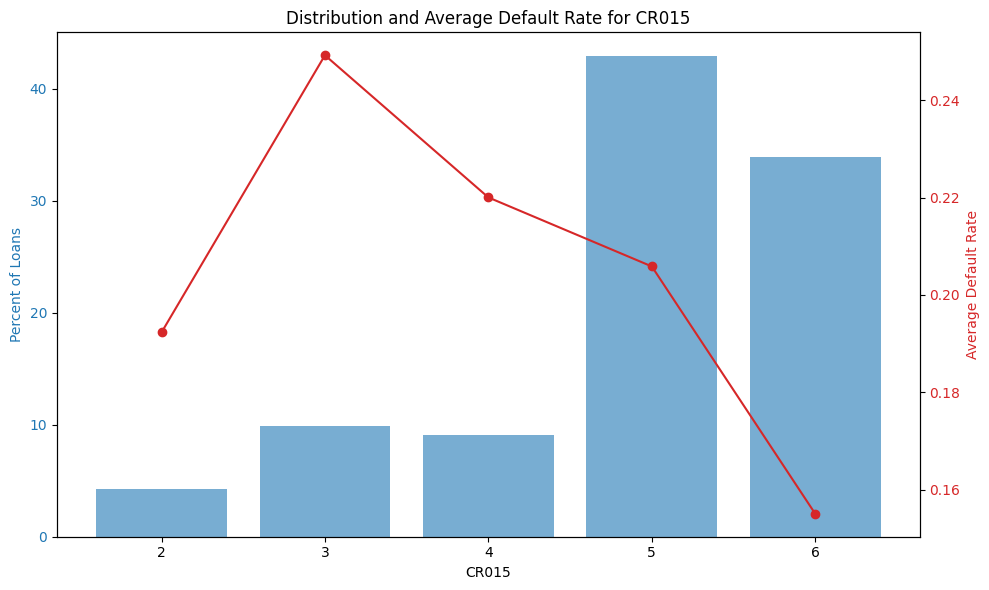

In [18]:
# Visualize the distribution and default rate for `CR015`
plot_categorical_analysis(variable_summary, 'CR015')


### Takeaways for `CR015` (Maximum Credit Card Mobility in Months)
1. **Distribution of Records**: The majority of records are concentrated in category `5`, followed by `6`. Categories `2`, `3`, and `4` have significantly fewer records, indicating that applicants with credit card mobility in these ranges are less common.
2. **Default Rate Trends**: The default rate (red line) peaks at category `3`, indicating a higher risk of default. There is a declining trend as the category number increases from `3` to `6`. Categories `5` and `6` have lower default rates, suggesting reduced risk.
3. **Insights for Modeling**: The downward trend in default rates across higher `CR015` categories suggests that longer credit card mobility in months is associated with a lower probability of default. This makes `CR015` a potentially valuable predictor for assessing loan default risk.

In summary, `CR015` shows a clear variation in default risk, with higher values indicating lower risk, contributing useful information for predictive modeling.


### Analyzing `CR019` (Single Debit Card Limit Score)
`CR019` represents the single debit card limit score from the credit bureau for the loan applicant. This score could reflect the applicant’s spending behavior and financial health, making it a relevant factor in understanding the likelihood of default.


In [19]:
# Generate summary table for `CR019`
variable_summary = analyze_categorical_variable(X_train, Y_train, 'CR019')
print(f"\nAnalysis for CR019:")
print(variable_summary)



Analysis for CR019:
       loan_count  avg_default  percent_loans
CR019                                        
1             834     0.221823       1.390000
2            6229     0.218494      10.381667
3           10002     0.216857      16.670000
4            7345     0.215793      12.241667
5            7223     0.197148      12.038333
6            3890     0.174807       6.483333
7            4842     0.194548       8.070000
8            2373     0.179941       3.955000
9            2167     0.160591       3.611667
10           1732     0.170323       2.886667
11          10065     0.164531      16.775000
12           3298     0.164948       5.496667


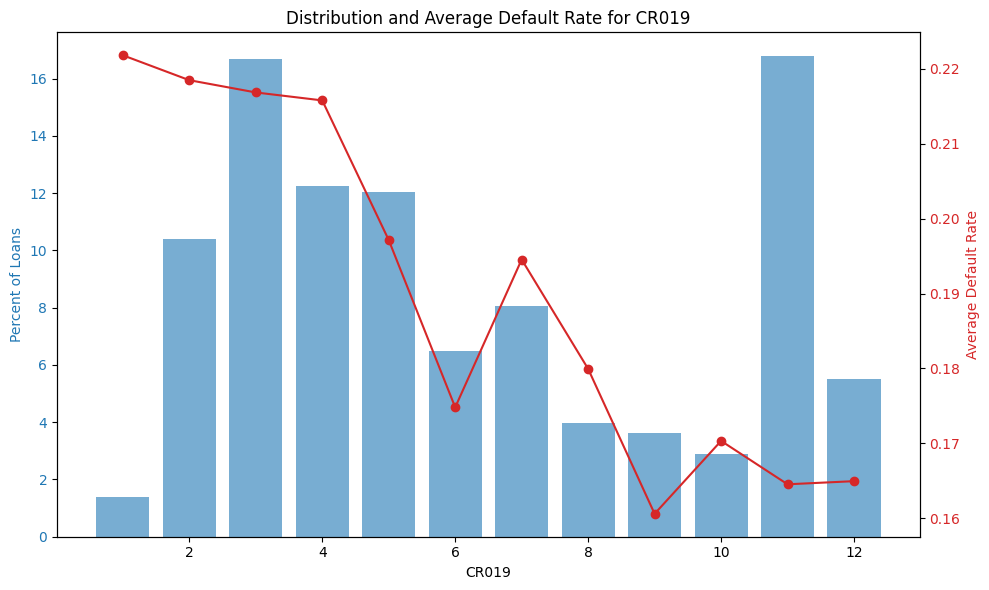

In [20]:
# Visualize the distribution and default rate for `CR019`
plot_categorical_analysis(variable_summary, 'CR019')


### Takeaways for `CR019` (Single Debit Card Limit Score)
1. **Distribution of Records**: The distribution of `CR019` values is fairly spread across the categories, with categories `4` and `5` having the highest percentages. The other categories have varying proportions, with category `2` having the lowest representation.
2. **Default Rate Trends**: The default rate (red line) generally decreases as the `CR019` value increases, with a notable peak around category `4`. There is a fluctuating pattern between `6` and `12`, indicating variability in risk across these categories.
3. **Insights for Modeling**: The differences in default rates across `CR019` categories indicate that this variable has predictive potential. Categories with lower values tend to have higher default rates, while higher `CR019` values are associated with lower default rates, suggesting that a higher debit card limit score may correlate with lower risk.

In summary, `CR019` exhibits a meaningful relationship with `loan_default`, providing potential utility for modeling credit risk.


### Analyzing `TD001` (Number of P2P Queries in Last 7 Days)
`TD001` indicates the number of Peer-to-Peer (P2P) lending queries made within the last 7 days for the applicant. This variable may provide insight into recent credit-seeking behavior, which could be linked to a higher probability of default.


In [21]:
# Generate summary table for `TD001`
variable_summary = analyze_categorical_variable(X_train, Y_train, 'TD001')
print(f"\nAnalysis for TD001:")
print(variable_summary)



Analysis for TD001:
       loan_count  avg_default  percent_loans
TD001                                        
0           14748     0.155682      24.580000
1           10093     0.165659      16.821667
2           16643     0.198161      27.738333
3            9040     0.213496      15.066667
4            4647     0.238003       7.745000
5            2153     0.251742       3.588333
6            1182     0.270728       1.970000
7             702     0.283476       1.170000
8             342     0.321637       0.570000
9             192     0.302083       0.320000
10            103     0.271845       0.171667
11             70     0.371429       0.116667
12             38     0.315789       0.063333
13             20     0.350000       0.033333
14             11     0.454545       0.018333
15              4     0.500000       0.006667
16              5     0.200000       0.008333
17              1     0.000000       0.001667
18              2     0.500000       0.003333
19           

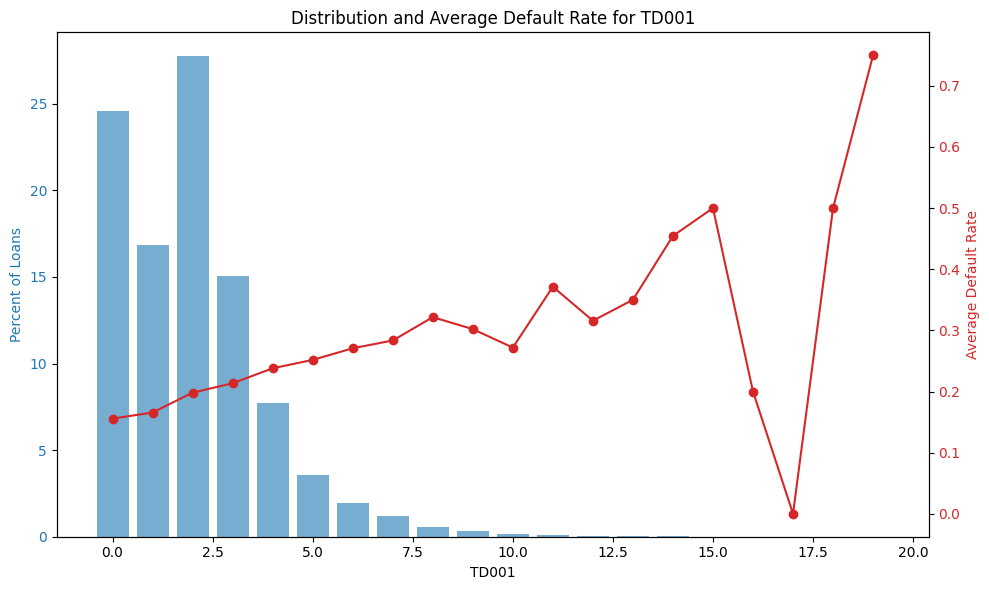

In [22]:
# Visualize the distribution and default rate for `TD001`
plot_categorical_analysis(variable_summary, 'TD001')


### Takeaways for `TD001` (Number of P2P Queries in Last 7 Days)
1. **Distribution of Records**: The majority of records fall into the lower categories of `TD001`, with most applicants having fewer than `5` P2P queries in the last 7 days. The distribution decreases as the number of queries increases.
2. **Default Rate Trends**: The default rate (red line) generally increases as the number of P2P queries rises. There is a sharp rise in the default rate when `TD001` exceeds `15`, indicating that a high number of P2P queries in a short period is associated with a significantly higher likelihood of default.
3. **Insights for Modeling**: The strong upward trend in the default rate as `TD001` increases suggests that this feature can be highly predictive. High query activity in the last 7 days is a risk indicator, and thus, `TD001` is likely to be a valuable feature for default risk assessment.

In summary, `TD001` shows a meaningful and strong relationship with `loan_default`, with higher values indicating higher risk.


### Analyzing `TD005` (Number of P2P Queries in Last 1 Month)
`TD005` indicates the number of Peer-to-Peer (P2P) lending queries made within the last month. This feature helps gauge the applicant's credit-seeking behavior over a longer period than `TD001`, and it may be correlated with the risk of default.


In [23]:
# Generate summary table for `TD005`
variable_summary = analyze_categorical_variable(X_train, Y_train, 'TD005')
print(f"\nAnalysis for TD005:")
print(variable_summary)



Analysis for TD005:
       loan_count  avg_default  percent_loans
TD005                                        
0            5837     0.128319       9.728333
1            6332     0.124921      10.553333
2           12646     0.164874      21.076667
3           10213     0.191129      17.021667
4            7603     0.203209      12.671667
5            5390     0.229314       8.983333
6            3820     0.242670       6.366667
7            2706     0.267554       4.510000
8            1833     0.255865       3.055000
9            1208     0.298841       2.013333
10            771     0.319066       1.285000
11            550     0.276364       0.916667
12            364     0.315934       0.606667
13            243     0.333333       0.405000
14            168     0.404762       0.280000
15            106     0.377358       0.176667
16             73     0.383562       0.121667
17             53     0.358491       0.088333
18             25     0.280000       0.041667
19           

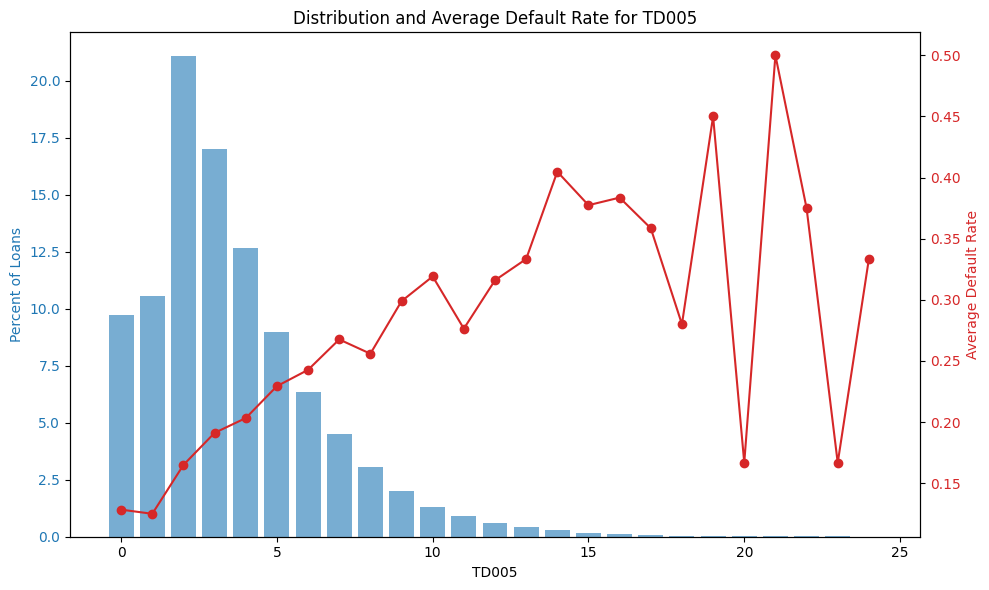

In [24]:
# Visualize the distribution and default rate for `TD005`
plot_categorical_analysis(variable_summary, 'TD005')


### Takeaways for `TD005` (Number of P2P Queries in Last 1 Month)
1. **Distribution of Records**: Most records are concentrated in the lower categories of `TD005`, with a majority of applicants having fewer than `10` P2P queries in the last month. The distribution decreases sharply as the number of queries increases.
2. **Default Rate Trends**: The default rate (red line) generally rises as the number of P2P queries increases, indicating a higher risk of default for applicants with more credit-seeking behavior over the past month. The sharp spikes in the default rate for higher values of `TD005` suggest that applicants with a high number of queries have a significantly increased risk of default.
3. **Insights for Modeling**: The strong upward trend in default rates with increasing `TD005` values suggests that this feature is predictive of default risk. The elevated risk associated with a high number of P2P queries in the last month makes `TD005` an important factor for credit risk modeling.

In summary, `TD005` demonstrates a clear relationship with `loan_default`, where increased query activity in the last month is associated with higher default risk.


### Analyzing `TD006` (Number of Small Loan Queries in Last 1 Month)
`TD006` represents the number of queries made for small loans within the last month for the applicant. This variable may capture the applicant's recent credit-seeking behavior for smaller loan amounts, which could be indicative of financial stress and an increased likelihood of default.


In [25]:
# Generate summary table for `TD006`
variable_summary = analyze_categorical_variable(X_train, Y_train, 'TD006')
print(f"\nAnalysis for TD006:")
print(variable_summary)



Analysis for TD006:
       loan_count  avg_default  percent_loans
TD006                                        
0           17609     0.167471      29.348333
1           21566     0.176435      35.943333
2           11688     0.209446      19.480000
3            5065     0.243238       8.441667
4            2129     0.268671       3.548333
5             944     0.287076       1.573333
6             462     0.322511       0.770000
7             219     0.305936       0.365000
8             123     0.333333       0.205000
9              85     0.482353       0.141667
10             43     0.302326       0.071667
11             28     0.392857       0.046667
12             11     0.454545       0.018333
13             10     0.300000       0.016667
14              5     0.400000       0.008333
15              2     0.500000       0.003333
16              1     1.000000       0.001667
17              5     0.600000       0.008333
18              3     0.333333       0.005000
20           

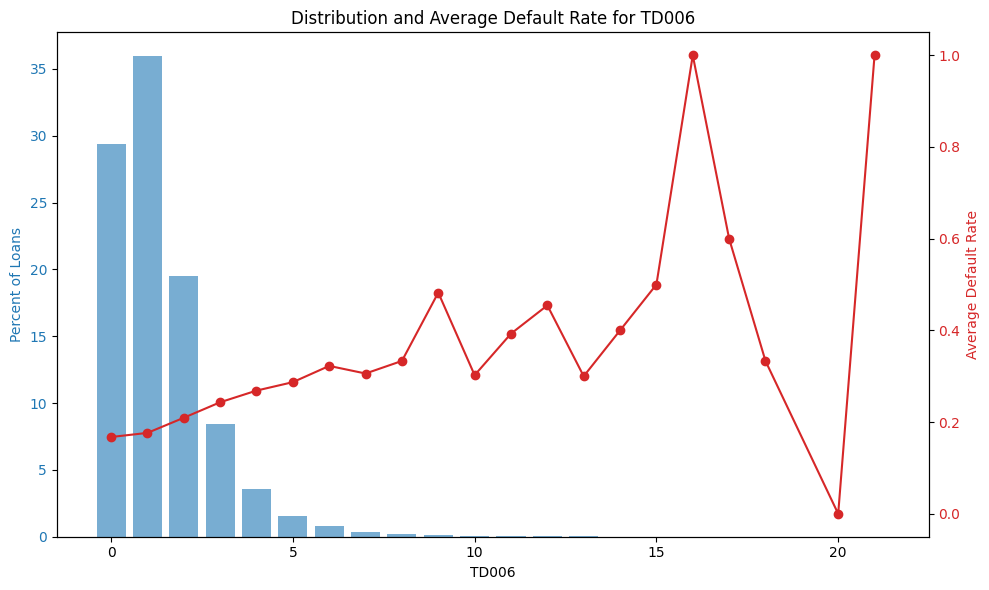

In [26]:
# Visualize the distribution and default rate for `TD006`
plot_categorical_analysis(variable_summary, 'TD006')


### Takeaways for `TD006` (Number of Small Loan Queries in Last 1 Month)
1. **Distribution of Records**: Most records are clustered around the lower values of `TD006`, indicating that a majority of applicants have fewer than `5` small loan queries in the last month. As the number of queries increases, the proportion of records decreases sharply.
2. **Default Rate Trends**: The default rate (red line) shows an upward trend as `TD006` values increase, with significant spikes at higher values (`>15`). These spikes indicate that applicants who have a high number of small loan queries in the last month are at a substantially increased risk of default. The variability and extreme spikes in default rates for high `TD006` values may suggest high-risk behavior.
3. **Insights for Modeling**: The marked increase in default rates with higher `TD006` values suggests that this feature can be predictive of credit risk. Since the likelihood of default increases sharply as the number of small loan queries rises, `TD006` is a valuable feature to include for credit risk assessment.

In summary, `TD006` shows a strong correlation with `loan_default`, indicating that a high frequency of small loan queries in the last month is a strong predictor of default risk.


### Analyzing `TD009` (Number of P2P Queries in Last 3 Months)
`TD009` represents the number of Peer-to-Peer (P2P) lending queries made within the last 3 months. This variable captures credit-seeking behavior over a medium timeframe and may help assess the risk of loan default based on recent borrowing activity.


In [27]:
# Generate summary table for `TD009`
variable_summary = analyze_categorical_variable(X_train, Y_train, 'TD009')
print(f"\nAnalysis for TD009:")
print(variable_summary)



Analysis for TD009:
       loan_count  avg_default  percent_loans
TD009                                        
0            2822     0.107016       4.703333
1            3659     0.115059       6.098333
2            8558     0.141972      14.263333
3            8323     0.161120      13.871667
4            7208     0.175222      12.013333
5            5839     0.194040       9.731667
6            4779     0.213225       7.965000
7            4075     0.220368       6.791667
8            3246     0.236907       5.410000
9            2756     0.254717       4.593333
10           2116     0.277410       3.526667
11           1575     0.278095       2.625000
12           1336     0.291168       2.226667
13            959     0.260688       1.598333
14            761     0.325887       1.268333
15            546     0.313187       0.910000
16            377     0.267905       0.628333
17            290     0.331034       0.483333
18            183     0.295082       0.305000
19           

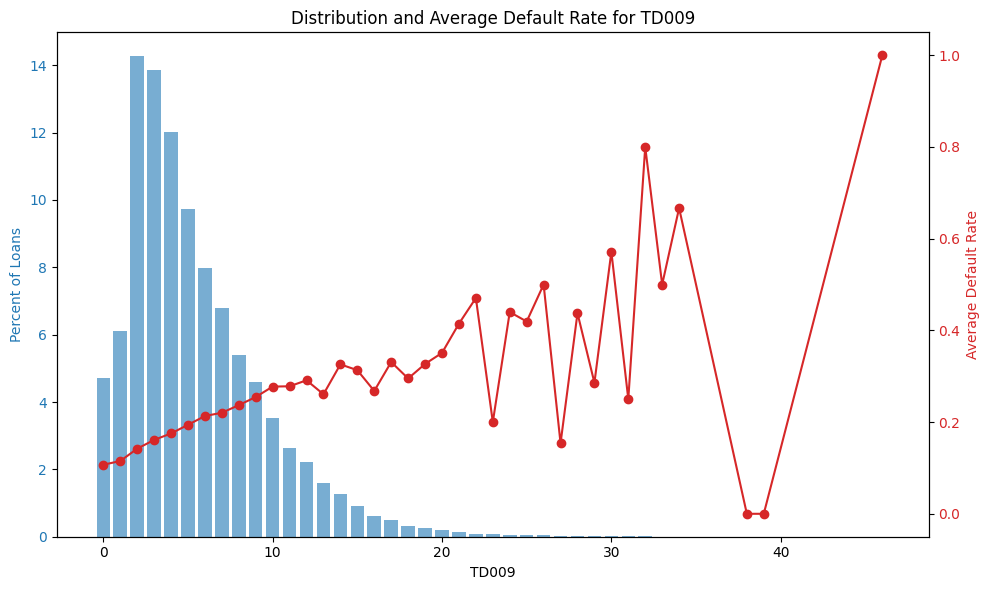

In [28]:
# Visualize the distribution and default rate for `TD009`
plot_categorical_analysis(variable_summary, 'TD009')


### Takeaways for `TD009` (Number of P2P Queries in Last 3 Months)
1. **Distribution of Records**: The majority of records have `TD009` values under `10`, indicating that most applicants had fewer than `10` P2P queries in the last 3 months. There is a sharp decline in the number of records as `TD009` values increase beyond `15`.
2. **Default Rate Trends**: The default rate (red line) shows an upward trend as `TD009` values increase, with noticeable spikes at values greater than `30`. These spikes suggest that applicants with a high number of P2P queries in the last 3 months have a much higher likelihood of default.
3. **Insights for Modeling**: The strong increase in default rates with higher `TD009` values indicates that this feature is highly predictive of default risk. Specifically, applicants with greater recent credit-seeking behavior are at a higher risk of default, making `TD009` an important variable for modeling.

In summary, `TD009` displays a strong relationship with `loan_default`, where a higher number of recent P2P queries corresponds to a greater risk of default.


### Analyzing `TD010` (Number of Small Loan Queries in Last 3 Months)
`TD010` represents the number of queries made for small loans within the last 3 months. This variable captures the applicant's credit-seeking behavior for small loans over a medium timeframe and may be indicative of financial stress or an increased risk of default.


In [29]:
# Generate summary table for `TD010`
variable_summary = analyze_categorical_variable(X_train, Y_train, 'TD010')
print(f"\nAnalysis for TD010:")
print(variable_summary)



Analysis for TD010:
       loan_count  avg_default  percent_loans
TD010                                        
0           11644     0.151323      19.406667
1           17482     0.164455      29.136667
2           12929     0.189883      21.548333
3            7898     0.226133      13.163333
4            4419     0.244173       7.365000
5            2425     0.274227       4.041667
6            1369     0.283419       2.281667
7             723     0.312586       1.205000
8             406     0.275862       0.676667
9             222     0.355856       0.370000
10            139     0.359712       0.231667
11            103     0.378641       0.171667
12             61     0.295082       0.101667
13             53     0.358491       0.088333
14             43     0.465116       0.071667
15             20     0.350000       0.033333
16             12     0.666667       0.020000
17             14     0.642857       0.023333
18              8     0.500000       0.013333
19           

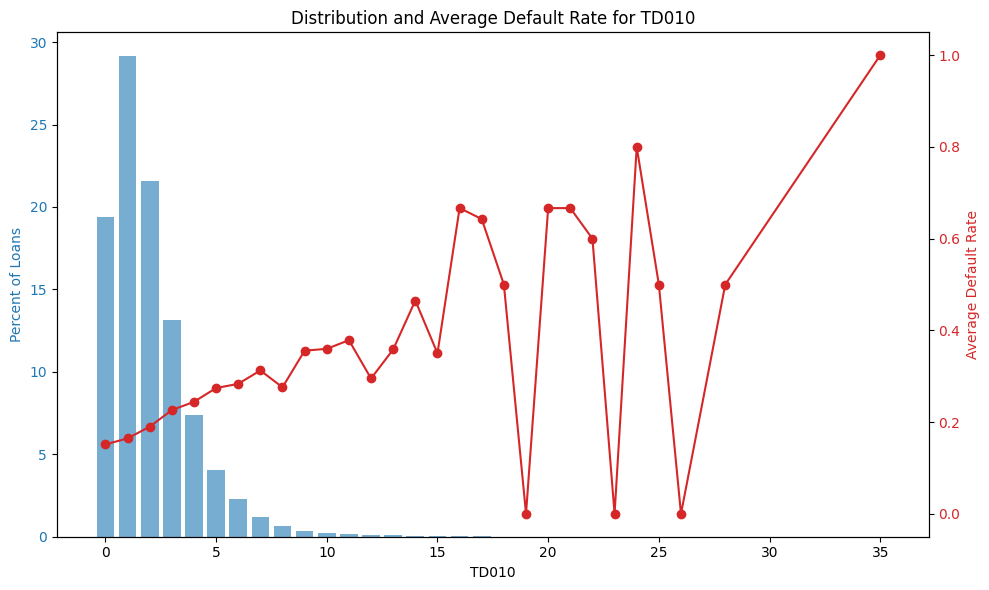

In [30]:
# Visualize the distribution and default rate for `TD010`
plot_categorical_analysis(variable_summary, 'TD010')


### Takeaways for `TD010` (Number of Small Loan Queries in Last 3 Months)
1. **Distribution of Records**: The majority of records have `TD010` values under `10`, indicating that most applicants had fewer than `10` small loan queries within the last 3 months. The number of records drops sharply beyond this value.
2. **Default Rate Trends**: There is a notable increase in the default rate as `TD010` values rise, with significant spikes around values greater than `15`. The default rate fluctuates considerably for higher `TD010` values, showing extreme peaks at certain points (e.g., near `25` and `35`). This suggests that applicants with a higher frequency of small loan queries have a significantly higher likelihood of default.
3. **Insights for Modeling**: The volatility of the default rate at higher `TD010` values highlights the importance of this variable in understanding default risk. Specifically, individuals who have more recent credit inquiries for small loans seem to exhibit a pattern of financial stress or potential instability, increasing their default risk.

In summary, `TD010` has a clear and impactful relationship with `loan_default`, where a higher number of small loan queries corresponds to a higher default risk, making it an important predictor for modeling purposes.


### Analyzing `TD014` (Number of Small Loan Queries in Last 6 Months)
`TD014` captures the number of queries made for small loans over the last 6 months. This variable is similar to `TD010` but provides a longer-term perspective on the applicant's credit-seeking behavior. Analyzing `TD014` may help us understand how the frequency of small loan inquiries over a longer timeframe correlates with the risk of default.


In [31]:
# Generate summary table for `TD014`
variable_summary = analyze_categorical_variable(X_train, Y_train, 'TD014')
print(f"\nAnalysis for TD014:")
print(variable_summary)



Analysis for TD014:
       loan_count  avg_default  percent_loans
TD014                                        
0            8953     0.140958      14.921667
1           14649     0.156598      24.415000
2           12403     0.180198      20.671667
3            8511     0.208201      14.185000
4            5574     0.229638       9.290000
5            3512     0.250000       5.853333
6            2224     0.265737       3.706667
7            1386     0.308081       2.310000
8             907     0.288864       1.511667
9             601     0.309484       1.001667
10            407     0.302211       0.678333
11            246     0.329268       0.410000
12            174     0.333333       0.290000
13            104     0.307692       0.173333
14            100     0.320000       0.166667
15             60     0.433333       0.100000
16             49     0.448980       0.081667
17             37     0.378378       0.061667
18             25     0.240000       0.041667
19           

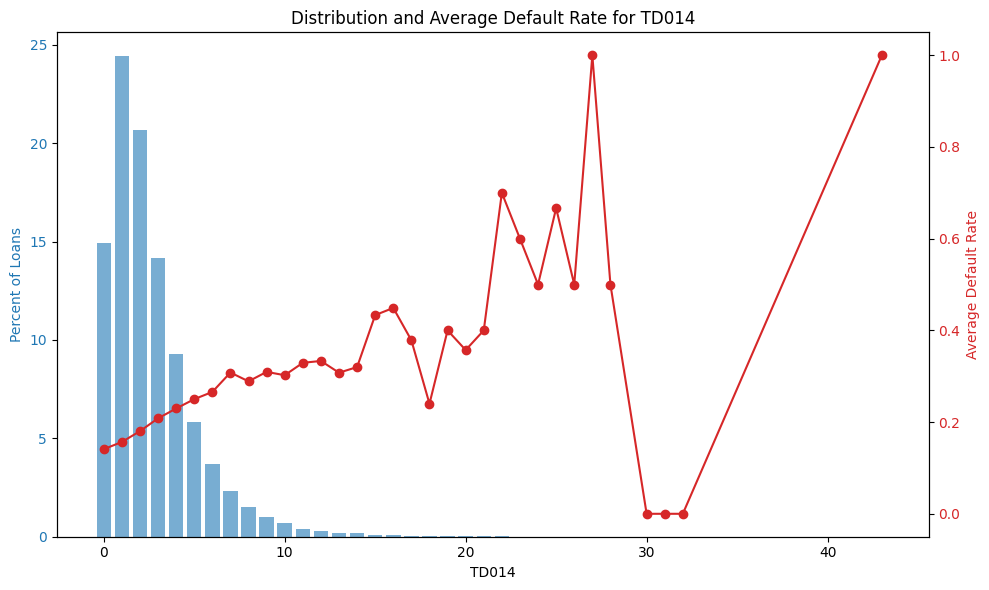

In [32]:
# Visualize the distribution and default rate for `TD014`
plot_categorical_analysis(variable_summary, 'TD014')


### Takeaways for `TD014` (Number of Small Loan Queries in Last 6 Months)
1. **Distribution of Records**: The majority of records have `TD014` values clustered around `0-10`, indicating that most applicants had fewer than `10` small loan queries within the last 6 months. The number of records declines significantly as the number of queries increases.
   
2. **Default Rate Trends**: The default rate generally increases as the `TD014` value rises, which suggests that individuals with more queries are more likely to default. There is a sharp rise in the default rate beyond `20` queries, with extreme peaks occurring around `30+` queries, where the rate approaches `1`. This indicates a significant risk for those applicants who have a very high number of small loan inquiries.

3. **Insights for Modeling**: The variable `TD014` shows a strong relationship with `loan_default`, especially for applicants with higher query counts. The pronounced increase in default risk with higher `TD014` values underscores the importance of monitoring small loan inquiries as an indicator of financial stress or credit-seeking behavior, which can be a valuable predictor in a default risk model.

In summary, `TD014` effectively distinguishes high-risk borrowers, as those with an increasing number of small loan queries in the last 6 months exhibit a heightened default risk. This trend makes it an important feature for predictive modeling in assessing credit risk.


### Analyzing `PA022` (Days Between Application and First Collection/High-Risk Call)

The variable `PA022` indicates the number of days between the loan application and the first collection or high-risk call. This variable helps identify early signals of financial stress or default risk. Before transforming the variable, an initial analysis was conducted to identify potential faulty or unusual values. The counts of these specific values are:
- Count of `-99`: 1155
- Count of `-98`: 0
- Count of `-1`: 38005
- Count of NAs: 283

The histogram of `PA022` shows the distribution of values, including faulty values. The plot highlights that a significant portion of the data contains `-1`, which may indicate missing or incorrect data, and some other outliers as `-99`. The large number of `-1` values can skew the analysis if not treated properly.

To address this, the variable `PA022` was transformed. Specifically, faulty values were categorized separately:
- `No_data`: NAs or missing values
- `Faulty_-99`: Values coded as `-99`
- `Faulty_-1`: Values coded as `-1`

This transformation helps in creating more meaningful bins for analysis and allows understanding of how the time taken for a high-risk call correlates with the likelihood of loan default.


Count of '-99' in PA022: 1155
Count of '-98' in PA022: 0
Count of '-1' in PA022: 38005
Count of NAs in PA022: 283


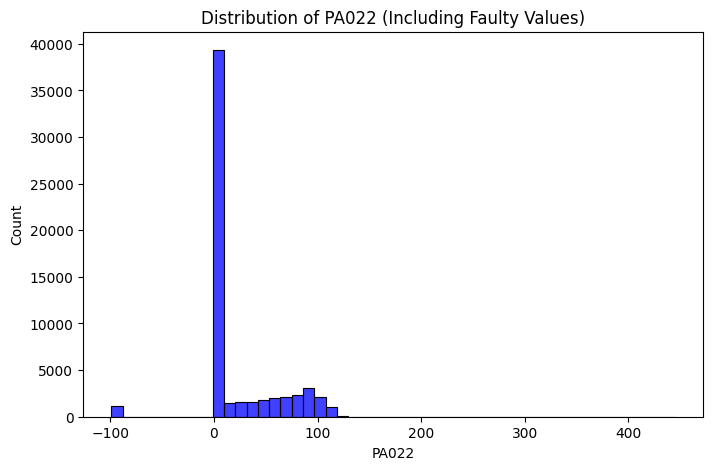

In [33]:
# Check the distribution of faulty values in `PA022`
faulty_values = [-99, -98, -1]
for val in faulty_values:
    count = X_train[X_train['PA022'] == val].shape[0]
    print(f"Count of '{val}' in PA022: {count}")

# Checking for NAs in `PA022`
na_count = X_train['PA022'].isna().sum()
print(f"Count of NAs in PA022: {na_count}")

# Distribution plot of PA022 including faulty values
plt.figure(figsize=(8, 5))
sns.histplot(X_train['PA022'], bins=50, kde=False, color='blue')
plt.title('Distribution of PA022 (Including Faulty Values)')
plt.xlabel('PA022')
plt.ylabel('Count')
plt.show()


In [34]:
# Creating a function to clean and transform `PA022` without binning valid values
def clean_and_label_faulty_pa022(X_train):
    # Create a new column to categorize faulty and missing values
    X_train['PA022_Transformed'] = X_train['PA022'].apply(lambda x: 
                                                          'Faulty_-99' if x == -99 else
                                                          'Faulty_-1' if x == -1 else
                                                          'No_data' if pd.isna(x) else 
                                                          x)
    
    return X_train

# Apply the cleaning and labeling process
X_train = clean_and_label_faulty_pa022(X_train)


In [35]:
# Apply the analyze function on the transformed `PA022_Transformed`
variable_summary = analyze_categorical_variable(X_train, Y_train, 'PA022_Transformed')

# Display the analysis
print(f"\nAnalysis for PA022_Transformed:")
print(variable_summary)


Analysis for PA022_Transformed:
                   loan_count  avg_default  percent_loans
PA022_Transformed                                        
0.0                       100     0.150000       0.166667
1.0                       159     0.251572       0.265000
2.0                       163     0.257669       0.271667
3.0                       128     0.257812       0.213333
4.0                       123     0.219512       0.205000
...                       ...          ...            ...
441.0                       1     0.000000       0.001667
445.0                       1     1.000000       0.001667
Faulty_-1               38005     0.171346      63.341667
Faulty_-99               1155     0.148918       1.925000
No_data                   283     0.215548       0.471667

[167 rows x 3 columns]


#### Key Takeaways for `PA022`

- **Prevalence of Faulty Values**: A significant portion of the data contains values coded as `-1` (approximately 38,005 occurrences). This suggests either missing data or a default placeholder, which might dilute the actual impact of valid values in `PA022`. Proper handling of these faulty values was crucial to avoid skewing the analysis.
  
- **Distribution Imbalance**: The variable contains relatively fewer values coded as `-99` (only 1,155), which indicates that while some data might be faulty, the majority of issues stem from the `-1` values.

- **Handling of Missing and Faulty Data**: Since there are 283 missing values (NAs), they were categorized as `No_data`. Both `-99` and `-1` were also recoded as `Faulty_-99` and `Faulty_-1`, respectively. This step was necessary to distinguish these faulty values from valid data points and to maintain data integrity.

- **Impact on Analysis**: The transformed `PA022` allows a clearer interpretation of customer behavior in terms of collection activity. By separating faulty values from valid data, subsequent analysis and modeling can more accurately identify correlations between early collection or high-risk calls and loan defaults.


### Analyzing `PA023` (Days Between Application and First Payment/High-Risk Call)

`PA023` is a variable that measures the number of days between the date of application and the first payment or high-risk call. It serves as an indicator of the timeliness of an applicant's first payment or the urgency in contacting them for collections. This variable can be important for assessing an applicant’s risk, as a longer gap might suggest either a delay in payment or a higher likelihood of risk follow-up.

The distribution of `PA023` includes faulty values such as `-99` and `-1`, which need to be cleaned or handled as they do not represent valid intervals between application and payment/high-risk calls.

#### Key Observations
1. **Faulty Values and NAs**: The summary shows a significant number of faulty values (`-1` and `-99`), with `-1` occurring frequently (42,005 times) and `-99` appearing 1,155 times. These faulty values need special handling since they do not carry valid information.
2. **NAs Present**: There are 283 missing values (`NAs`) in `PA023`, which also need to be addressed to ensure accurate modeling.
3. **Distribution**: A histogram plot reveals the distribution of `PA023` values, indicating how most of the values are clustered around specific intervals with many faulty entries.

The analysis of `PA023` can help identify patterns in the payment behavior of applicants, and the variable should be cleaned before further modeling. Proper binning and handling of faulty and NA values is necessary to improve model performance and interpretation.


Count of '-99' in PA023: 1155
Count of '-98' in PA023: 0
Count of '-1' in PA023: 42005
Count of NAs in PA023: 283


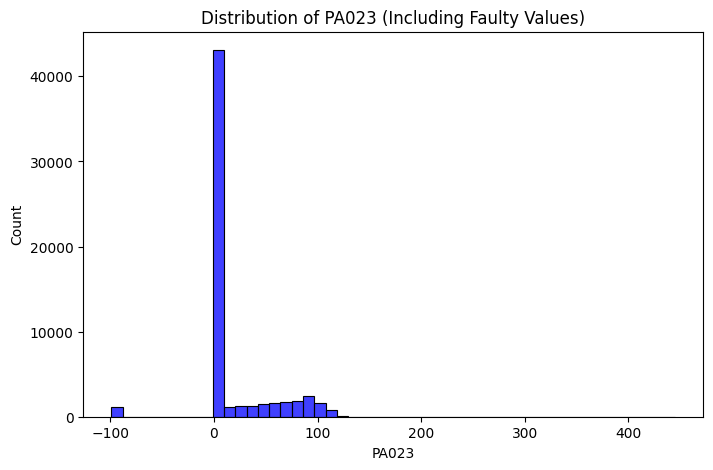

In [36]:
# Check the distribution of faulty values in `PA023`
faulty_values = [-99, -98, -1]
for val in faulty_values:
    count = X_train[X_train['PA023'] == val].shape[0]
    print(f"Count of '{val}' in PA023: {count}")

# Checking for NAs in `PA023`
na_count = X_train['PA023'].isna().sum()
print(f"Count of NAs in PA023: {na_count}")

# Distribution plot of PA023 including faulty values
plt.figure(figsize=(8, 5))
sns.histplot(X_train['PA023'], bins=50, kde=False, color='blue')
plt.title('Distribution of PA023 (Including Faulty Values)')
plt.xlabel('PA023')
plt.ylabel('Count')
plt.show()


In [37]:
# Creating a function to clean and transform `PA022` without binning valid values
def clean_and_label_faulty_pa023(X_train):
    # Create a new column to categorize faulty and missing values
    X_train['PA023_Transformed'] = X_train['PA023'].apply(lambda x: 
                                                          'Faulty_-99' if x == -99 else
                                                          'Faulty_-1' if x == -1 else
                                                          'No_data' if pd.isna(x) else 
                                                          x)
    
    return X_train

# Apply the cleaning and labeling process
X_train = clean_and_label_faulty_pa023(X_train)


In [38]:
# Apply the analyze function on the transformed `PA023_Transformed`
variable_summary = analyze_categorical_variable(X_train, Y_train, 'PA023_Transformed')

# Display the analysis
print(f"\nAnalysis for PA023_Transformed:")
print(variable_summary)


Analysis for PA023_Transformed:
                   loan_count  avg_default  percent_loans
PA023_Transformed                                        
0.0                        87     0.126437       0.145000
1.0                       136     0.242647       0.226667
2.0                       129     0.263566       0.215000
3.0                       103     0.271845       0.171667
4.0                       109     0.192661       0.181667
...                       ...          ...            ...
441.0                       1     0.000000       0.001667
445.0                       1     1.000000       0.001667
Faulty_-1               42005     0.175312      70.008333
Faulty_-99               1155     0.148918       1.925000
No_data                   283     0.215548       0.471667

[162 rows x 3 columns]


#### Key Takeaways for `PA023`

- **High Prevalence of Faulty Values**: A significant number of entries for `PA023` are coded as `-1`, totaling **42,005** instances. These values need to be properly handled as they dominate the distribution and do not represent valid intervals between the application date and first payment/high-risk call. Additionally, there are **1,155** values coded as `-99`, which may be placeholder or missing values.
  
- **Handling Missing and Faulty Data**: Alongside the faulty values, **283** `NaN` entries exist within `PA023`. To address this, a transformation was applied to categorize the faulty and missing values into distinct labels:
  - **`Faulty_-99`** for `-99` values.
  - **`Faulty_-1`** for `-1` values.
  - **`No_data`** for `NaN` entries.
  
  These transformations ensure that faulty data is handled separately from valid values.

- **Distribution Characteristics**: The histogram of `PA023` displays a skewed distribution due to the high concentration of `-1` values. This suggests a need for careful interpretation of this variable, as the faulty values overshadow the valid data and may affect any modeling.

- **Implications for Modeling**: The separation of faulty values and `NaN`s into distinct categories allows for better modeling by isolating invalid or placeholder values from valid entries. This ensures that the valid data for `PA023` can be used effectively in subsequent analysis while faulty data is treated appropriately.


## 2.2 Distribution of Continuous Variables
To understand the behavior of Continuous variables in `X_train`, we first clean and bin the values and then use use count plots to visualize their distributions. Additionally, we explore how these variables interact with the target variable `loan_default`.

### Analyzing `PA029` (Average Length of Collection/High-Risk Inbound Calls)

`PA029` reflects the average duration of collection-related or high-risk inbound calls. This variable potentially indicates an individual's engagement level during financial interactions, providing insights into their risk profile for loan default. The distribution of `PA029` is examined by considering faulty values (`-98`, `-99`) and missing data separately from valid values.

#### Key Findings

- **Faulty & Missing Values**: A large portion of `PA029` data includes faulty values: `-98` and `-99`. Specifically, there are **1,155** occurrences of `-99` and **39,807** occurrences of `-98`. These represent approximately **67%** of the total data. Additionally, a small number of **283** `NA` entries are present.
  
- **Distribution of Valid Values**: The valid values of `PA029` (excluding faulty and missing data) have been binned to facilitate analysis. The transformation process reveals a right-skewed distribution, with most durations falling into lower time ranges. This indicates that the majority of inbound calls are relatively short, with fewer prolonged durations.

- **Binning Strategy**: To ensure proper categorization, the data is binned based on quantiles with the 95th percentile set as an upper threshold before categorization. Faulty values are handled by assigning them to separate bins labeled `Faulty_-99` and `Faulty_-98`.
  
This analysis highlights the importance of handling faulty data for meaningful interpretation of `PA029`. The prevalence of faulty values suggests a need for careful treatment when modeling the relationship between call duration and default risk.



Count of '-99' in PA029: 1155
Count of '-98' in PA029: 39807
Count of '-1' in PA029: 0
Count of NAs in PA029: 283


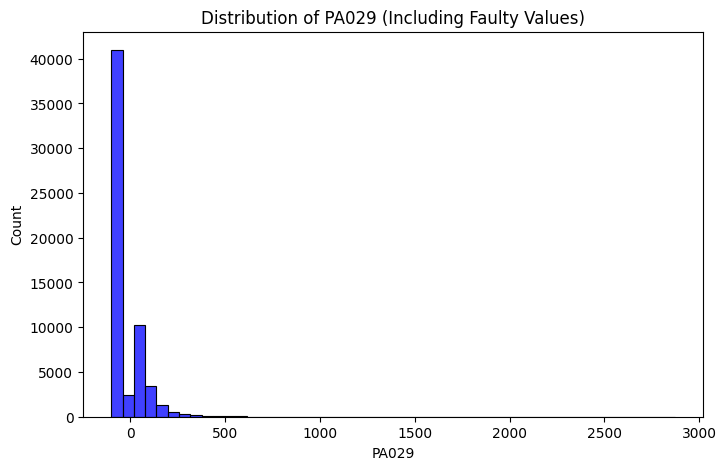

In [39]:
# Check the distribution of faulty values in `PA029`
faulty_values = [-99, -98, -1]
for val in faulty_values:
    count = X_train[X_train['PA029'] == val].shape[0]
    print(f"Count of '{val}' in PA029: {count}")

# Checking for NAs in `PA029`
na_count = X_train['PA029'].isna().sum()
print(f"Count of NAs in PA029: {na_count}")

# Distribution plot of PA029 including faulty values
plt.figure(figsize=(8, 5))
sns.histplot(X_train['PA029'], bins=50, kde=False, color='blue')
plt.title('Distribution of PA029 (Including Faulty Values)')
plt.xlabel('PA029')
plt.ylabel('Count')
plt.show()


In [40]:
print(type(X_train))

<class 'pandas.core.frame.DataFrame'>


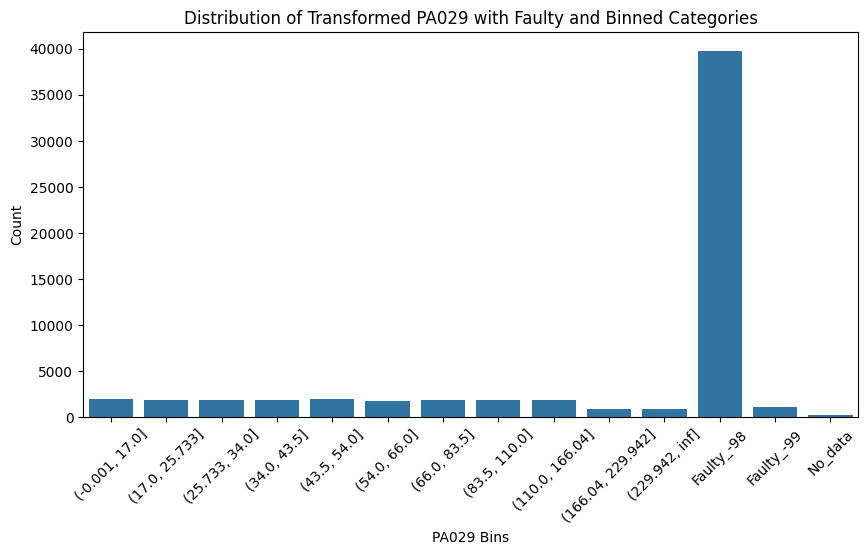

In [41]:
# Creating a function to clean and transform `PA029`
def clean_and_transform_pa029(X_train):
    # Create a new column for faulty indicators
    X_train['PA029_Faulty'] = X_train['PA029'].apply(lambda x: 
                                                     'Faulty_-99' if x == -99 else
                                                     'Faulty_-98' if x == -98 else
                                                     'No_data' if pd.isna(x) else 
                                                     'Valid')

    # Handle faulty values by setting them to NaN for the purpose of binning
    X_train['PA029_Clean'] = X_train['PA029'].replace([-98, -99], np.nan)
    
    # Get the bins using `pd.qcut()` for valid values only
    _, bins = pd.qcut(X_train.loc[~X_train['PA029'].isin([-98, -99]), 'PA029'], 10, duplicates='drop', retbins=True)

    # Adjust our bins by replacing the 2nd last bin to the 95th Percentile and set the last cut point to infinity.
    bins[-1]=np.percentile(X_train.loc[~X_train['PA029'].isin([-98,-99, np.nan]),'PA029'], 95)
    bins = np.append(bins, np.inf)
    
    
    # Binning `PA029` into meaningful categories (including faulty)
    X_train['PA029_Binned'] = pd.cut(
        X_train['PA029_Clean'], 
        bins=bins,
        include_lowest=True
    )
    
    # Reintroduce faulty values into the binned column
    X_train['PA029_Binned'] = X_train.apply(lambda row: row['PA029_Faulty'] if row['PA029_Faulty'] != 'Valid' else row['PA029_Binned'], axis=1)
    
    return X_train, bins

# Apply the cleaning and transformation process
X_train, pa029_bins = clean_and_transform_pa029(X_train)

# Convert to a categorical type
X_train['PA029_Binned'] = pd.Categorical(X_train['PA029_Binned'])
    
# Visualize distribution of the transformed `PA029` with bins and faulty values
plt.figure(figsize=(10, 5))
sns.countplot(x=X_train['PA029_Binned'])
plt.xticks(rotation=45)
plt.title('Distribution of Transformed PA029 with Faulty and Binned Categories')
plt.xlabel('PA029 Bins')
plt.ylabel('Count')
plt.show()


In [42]:
def plot_categorical_analysis_binned(summary, variable):
    
    fig, ax1 = plt.subplots(figsize=(10, 6))

    # Convert index to strings explicitly
    x_vals = summary.index.astype(str)

    # Bar plot for percentage of records in each category
    color = 'tab:blue'
    ax1.set_xlabel(variable)
    ax1.set_ylabel('Percent of Loans', color=color)
    ax1.bar(x_vals, summary['percent_loans'], color=color, alpha=0.6, label='Percent of Loans')
    ax1.tick_params(axis='y', labelcolor=color)
    ax1.set_xticklabels(x_vals, rotation=45, ha="right")

    # Secondary y-axis for average default rate
    ax2 = ax1.twinx()
    color = 'tab:red'
    ax2.set_ylabel('Average Default Rate', color=color)
    ax2.plot(x_vals, summary['avg_default'], color=color, marker='o', label='Average Default Rate')
    ax2.tick_params(axis='y', labelcolor=color)

    # Title and layout
    plt.title(f'Distribution and Average Default Rate for {variable}')
    fig.tight_layout()
    plt.show()


/var/folders/sf/wx2npf5s5173yr23sxjzqyzh0000gn/T/ipykernel_31030/3265003895.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary = df.groupby(variable).agg(
/var/folders/sf/wx2npf5s5173yr23sxjzqyzh0000gn/T/ipykernel_31030/2868880998.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(x_vals, rotation=45, ha="right")



Analysis for PA029_Binned:
                   loan_count  avg_default  percent_loans
PA029_Binned                                             
(-0.001, 17.0]           1931     0.190575       3.218333
(17.0, 25.733]           1820     0.202198       3.033333
(25.733, 34.0]           1890     0.223280       3.150000
(34.0, 43.5]             1862     0.218582       3.103333
(43.5, 54.0]             1970     0.254315       3.283333
(54.0, 66.0]             1786     0.245801       2.976667
(66.0, 83.5]             1879     0.254391       3.131667
(83.5, 110.0]            1867     0.269952       3.111667
(110.0, 166.04]          1874     0.259338       3.123333
(166.04, 229.942]         938     0.256930       1.563333
(229.942, inf]            938     0.253731       1.563333
Faulty_-98              39807     0.174115      66.345000
Faulty_-99               1155     0.148918       1.925000
No_data                   283     0.215548       0.471667


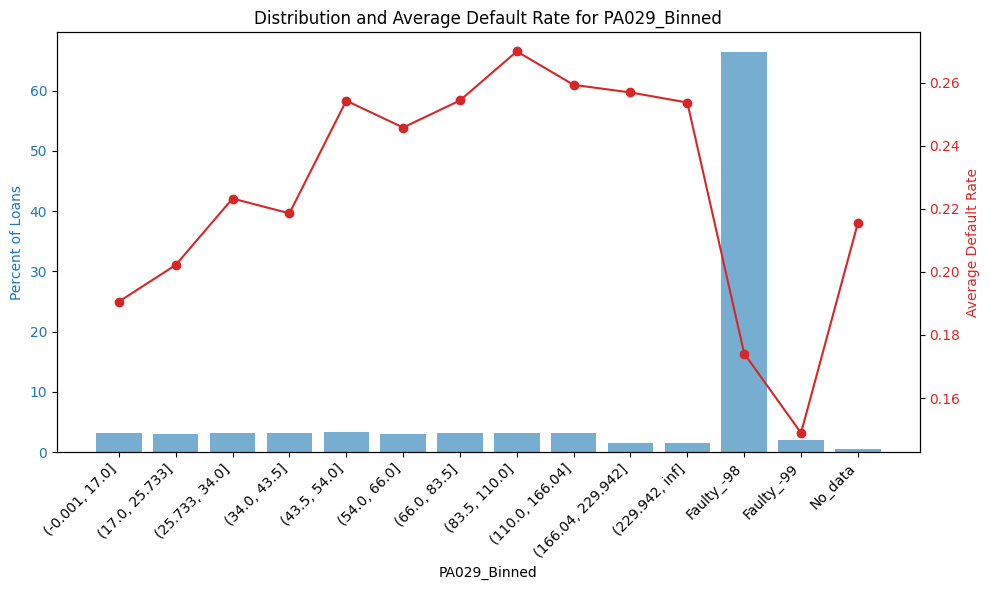

In [43]:
# Apply the analyze function on the transformed `PA029_Binned`
variable_summary = analyze_categorical_variable(X_train, Y_train, 'PA029_Binned')

# Display the analysis
print(f"\nAnalysis for PA029_Binned:")
print(variable_summary)

# Visualize the distribution and default rate for `PA029_Binned`
plot_categorical_analysis_binned(variable_summary, 'PA029_Binned')


### Key Takeaways for `PA029` (Average Length of Collection/High-Risk Inbound Calls)

1. **Variable Overview**: 
   - `PA029` represents the average duration of inbound calls related to collections or high-risk scenarios.
   - The distribution is skewed, with a large number of faulty values (`-98`, `-99`) and `NaNs`.

2. **Distribution Details**:
   - Faulty values are prominent in the data: `-99` appears **1,155** times, and `-98` appears **39,807** times.
   - There are only a small number of **283** missing values (`NaNs`).

3. **Binning and Transformations**:
   - `PA029` was binned to effectively handle the skewness in the data.
   - To manage faulty values, they were isolated into separate bins for `-98` and `-99`, which allowed for a cleaner analysis of the valid values.

4. **Implications**:
   - The high count of faulty values suggests they may hold important information about the applicants' behaviors.
   - The binned `PA029` provides a more meaningful interpretation of how call lengths could relate to loan default, separating faulty data from valid ranges.

This analysis reveals that `PA029` has significant faulty data, which needed to be managed before interpretation. The use of binning and categorization has made the variable more useful for modeling and assessing its relationship with default risk.


### Analyzing `CR009` (Amount of Loan Total)

`CR009` represents the total amount of the loan applied for or issued. As a key financial feature, it provides insights into the size of the loan and how it may influence the applicant's likelihood of default. Larger loan amounts might be associated with higher default risk, while smaller loans could indicate less financial risk to the lender.

#### Key Observations

- **No Faulty Values**: Unlike other variables (`PA022` and `PA029`), `CR009` does not contain faulty values such as `-98` or `-99`. This makes it easier to work with, as no specific replacement or categorization of faulty data is needed.

- **Distribution Characteristics**: The distribution of `CR009` shows diverse ranges in loan amounts. A visualization of the distribution highlights that some ranges are more populated than others, indicating common loan amounts or lending thresholds.

- **Binning Strategy**: To better categorize `CR009` for modeling, the valid values were binned based on quantiles. The upper bound of the second-to-last bin was set to the 95th percentile, and the last bin was extended to include values up to infinity. This approach ensures that outliers and extreme loan amounts are captured within the last bin.

#### Implications for Modeling

- **Balanced Categorization**: The quantile-based binning ensures balanced categories that make `CR009` suitable for further predictive modeling, allowing us to capture both common and extreme loan values effectively.
  
- **Insight into Loan Behavior**: The proper handling and binning of `CR009` enable a clearer understanding of how different loan sizes might correlate with default behavior, improving model interpretability.

The careful analysis of `CR009` through distribution examination and strategic binning lays a foundation for more robust modeling and prediction of loan default likelihood.


Count of '-99' in CR009: 0
Count of '-98' in CR009: 0
Count of '-1' in CR009: 0
Count of NAs in CR009: 0


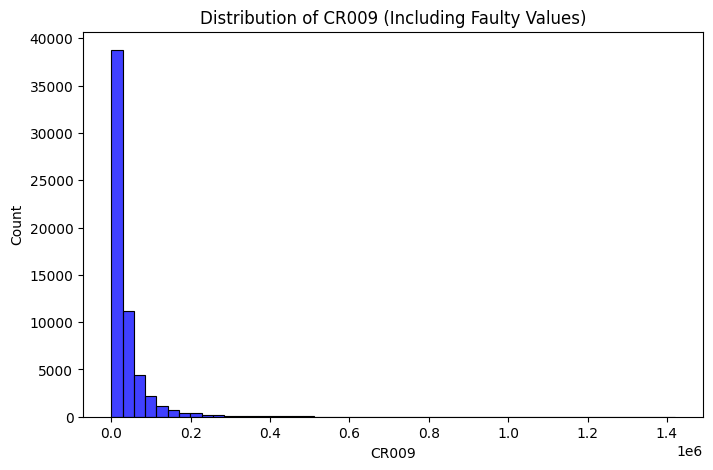

In [44]:
# Check the distribution of faulty values in `CR009`
faulty_values = [-99, -98, -1]
for val in faulty_values:
    count = X_train[X_train['CR009'] == val].shape[0]
    print(f"Count of '{val}' in CR009: {count}")

# Checking for NAs in `CR009`
na_count = X_train['CR009'].isna().sum()
print(f"Count of NAs in CR009: {na_count}")

# Distribution plot of CR009 including faulty values
plt.figure(figsize=(8, 5))
sns.histplot(X_train['CR009'], bins=50, kde=False, color='blue')
plt.title('Distribution of CR009 (Including Faulty Values)')
plt.xlabel('CR009')
plt.ylabel('Count')
plt.show()



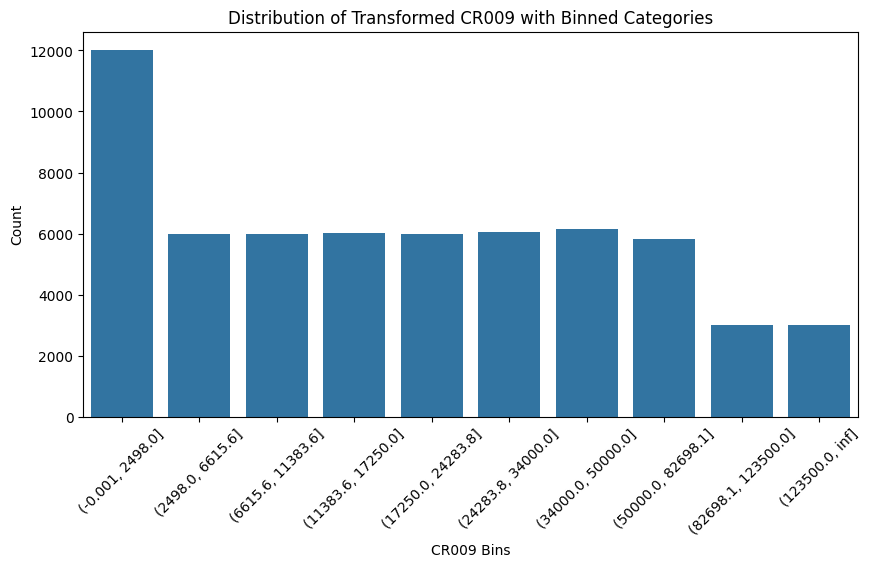

In [45]:
# Creating a function to clean and transform `CR009`
def clean_and_transform_CR009(X_train):
    # Get the bins using `pd.qcut()`
    _, bins = pd.qcut(X_train['CR009'], 10, duplicates='drop', retbins=True)

    # Adjust bins: replace the 2nd last bin with the 95th Percentile and set the last cut point to infinity
    bins[-1] = np.percentile(X_train['CR009'], 95)  # No need to filter for NaNs
    bins = np.append(bins, np.inf)
    bins_cr009 = bins
    
    # Binning `CR009` into meaningful categories
    X_train['CR009_Binned'] = pd.cut(
        X_train['CR009'],  # assuming no clean version, or adjust as necessary
        bins=bins_cr009,
        include_lowest=True
    )

    return X_train, bins_cr009

# Apply the cleaning and transformation process
X_train, bins_cr009 = clean_and_transform_CR009(X_train)

# Convert to a categorical type
X_train['CR009_Binned'] = pd.Categorical(X_train['CR009_Binned'])
    
# Visualize distribution of the transformed `CR009` with bins
plt.figure(figsize=(10, 5))
sns.countplot(x=X_train['CR009_Binned'])
plt.xticks(rotation=45)
plt.title('Distribution of Transformed CR009 with Binned Categories')
plt.xlabel('CR009 Bins')
plt.ylabel('Count')
plt.show()


/var/folders/sf/wx2npf5s5173yr23sxjzqyzh0000gn/T/ipykernel_31030/3265003895.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary = df.groupby(variable).agg(
/var/folders/sf/wx2npf5s5173yr23sxjzqyzh0000gn/T/ipykernel_31030/2868880998.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(x_vals, rotation=45, ha="right")



Analysis for CR009_Binned:
                     loan_count  avg_default  percent_loans
CR009_Binned                                               
(-0.001, 2498.0]          12012     0.179321      20.020000
(2498.0, 6615.6]           5988     0.214095       9.980000
(6615.6, 11383.6]          6000     0.206333      10.000000
(11383.6, 17250.0]         6004     0.207695      10.006667
(17250.0, 24283.8]         5996     0.207138       9.993333
(24283.8, 34000.0]         6050     0.207769      10.083333
(34000.0, 50000.0]         6137     0.196839      10.228333
(50000.0, 82698.1]         5813     0.174265       9.688333
(82698.1, 123500.0]        3003     0.171828       5.005000
(123500.0, inf]            2997     0.153153       4.995000


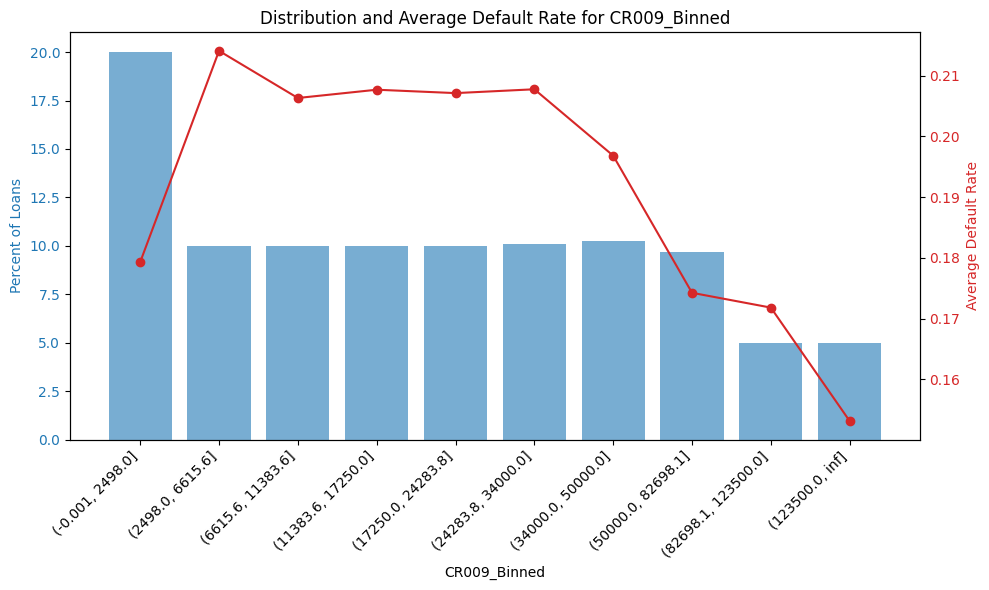

In [46]:
# Apply the analyze function on the transformed `CR009_Binned`
variable_summary = analyze_categorical_variable(X_train, Y_train, 'CR009_Binned')

# Display the analysis
print(f"\nAnalysis for CR009_Binned:")
print(variable_summary)

# Visualize the distribution and default rate for `CR009_Binned`
plot_categorical_analysis_binned(variable_summary, 'CR009_Binned')


### Key Takeaways for `CR009`

- **Distribution of Loan Amounts**: The loan amounts (`CR009`) are spread across multiple ranges, and these ranges have been binned to provide meaningful categories. The distribution shows a larger number of applicants with loan amounts on the lower end, which decreases as the loan amount increases.

- **Default Rate by Bins**: The default rates are slightly higher in the middle ranges of the binned loan amounts and tend to decrease at both the very high and very low ends. This suggests that applicants who are either requesting very small or very large loans may have a lower likelihood of default compared to those requesting moderate amounts.

- **Binning and Transformation**: Binning `CR009` into quantile-based categories helped manage the continuous nature of the variable and highlighted important patterns in default behavior across loan sizes. The last bin was adjusted to include all extreme values beyond the 95th percentile.

#### Summary
`CR009` is a crucial variable for understanding loan default risk. By segmenting loan amounts into bins, we can see varying risk profiles across different loan sizes. The key insight is that moderate loan sizes appear to carry a higher risk of default compared to very small or very large loans, which can be pivotal for financial decision-making and credit risk assessment.


## 2.3 Apply the same transformations to X_test dataset

We need to do this so that both the `X_train` and `X_test` variables can be properly encoded.

In [47]:
# PA022: Apply the cleaning and labeling process
X_test = clean_and_label_faulty_pa022(X_test)

# PA023: Apply the cleaning and labeling process
X_test = clean_and_label_faulty_pa023(X_test)

# CR009:
# Apply the bins from `X_train` to `X_test` for CR009
X_test['CR009_Binned'] = pd.cut(
    X_test['CR009'],
    bins=bins_cr009,
    include_lowest=True
)

# Convert to categorical type for consistency
X_test['CR009_Binned'] = pd.Categorical(X_test['CR009_Binned'])


# PA029:
# Apply the bins from `X_train` to `X_test` for PA029 (consider faulty values)
X_test['PA029_Faulty'] = X_test['PA029'].apply(lambda x: 
                                               'Faulty_-99' if x == -99 else
                                               'Faulty_-98' if x == -98 else
                                               'No_data' if pd.isna(x) else 
                                               'Valid')

X_test['PA029_Clean'] = X_test['PA029'].replace([-98, -99], np.nan)

X_test['PA029_Binned'] = pd.cut(
    X_test['PA029_Clean'],
    bins=pa029_bins,
    include_lowest=True
)

# Reintroduce faulty values into the binned column
X_test['PA029_Binned'] = X_test.apply(lambda row: row['PA029_Faulty'] if row['PA029_Faulty'] != 'Valid' else row['PA029_Binned'], axis=1)

# Convert to categorical type for consistency
X_test['PA029_Binned'] = pd.Categorical(X_test['PA029_Binned'])

# 3. Weight-of-Evidence (WOE) Transformation

### Overview
To improve our model's performance, we will transform categorical variables using Weight-of-Evidence (WOE) encoding. WOE encoding helps establish a monotonic relationship between the predictor variables and the target variable (`loan_default`). This transformation is particularly useful for categorical variables, where the WOE measure can better reveal relationships with the outcome by re-binning categories.

### Purpose of WOE
The main goal of WOE encoding is to create bins or groups within categorical variables that can be better compared against the target variable. This helps in understanding the impact of each category on the likelihood of `loan_default`. Each bin receives a WOE value that signifies how well that category is correlated with the target.

### WOE Transformation Process
1. **Binning:** Each categorical variable is binned based on the observed distribution.
2. **Calculation of WOE Values:** For each bin, WOE values are calculated using the formula:
   
   $$
   \text{WOE} = \ln \left( \frac{\text{Percentage of Non-Defaults in the bin}}{\text{Percentage of Defaults in the bin}} \right)
   $$

   The WOE value provides insight into whether the occurrence of defaults in a bin is higher or lower than expected.

3. **Application to Variables:** The WOE transformation is applied to the categorical variables in both the training and test datasets.

4. **Impact on Model Building:** Once WOE values are assigned to each category, the transformed variables are then used for logistic regression to examine whether the transformation improves model performance as compared to using the original variables.

> In the subsequent sections, we will detail the application of WOE transformation on individual variables and assess how they impact our final logistic regression model.


In [48]:
# Function to calculate WOE for a given variable
def calculate_woe(df, variable, target):
   
    # Calculate total counts of defaults and non-defaults
    total_non_default = df[df[target] == 0].shape[0]
    total_default = df[df[target] == 1].shape[0]
    
    # Group by variable to calculate counts and proportions
    grouped = df.groupby(variable)[target].agg(['count', 'sum'])
    grouped['non_default'] = grouped['count'] - grouped['sum']
    
    # Calculate proportions of defaults and non-defaults
    grouped['default_prop'] = (grouped['sum']+ 0.0001) / total_default
    grouped['non_default_prop'] = (grouped['non_default']+ 0.0001) / total_non_default
    
    # Calculate WOE for each category
    grouped['WOE'] = np.log(grouped['non_default_prop'] / grouped['default_prop'])
    
    return grouped['WOE']




In [49]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 60000 entries, 26553 to 14753
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   AP001              60000 non-null  int64   
 1   AP003              60000 non-null  int64   
 2   AP008              60000 non-null  int64   
 3   CR009              60000 non-null  int64   
 4   CR015              60000 non-null  int64   
 5   CR019              60000 non-null  int64   
 6   PA022              59717 non-null  float64 
 7   PA023              59717 non-null  float64 
 8   PA029              59717 non-null  float64 
 9   TD001              60000 non-null  int64   
 10  TD005              60000 non-null  int64   
 11  TD006              60000 non-null  int64   
 12  TD009              60000 non-null  int64   
 13  TD010              60000 non-null  int64   
 14  TD014              60000 non-null  int64   
 15  PA022_Transformed  60000 non-null  object  
 16  PA023

In [50]:
# List of variables to transform using WOE
clean_cols = ['AP001', 'AP003', 'AP008', 'CR009_Binned', 'CR015', 'CR019', 
            'PA022_Transformed', 'PA023_Transformed', 'PA029_Binned', 'TD001', 'TD005', 'TD006', 
            'TD009', 'TD010', 'TD014']

# Filter `X_train` to keep only the final cleaned columns
X_train_cleaned = X_train[clean_cols]
X_test_cleaned = X_test[clean_cols]

# Mapping of cleaned columns in `X_train` & in `X_test` to original columns 
reverse_column_rename_mapping = {
    'CR009_Binned': 'CR009',
    'PA029_Binned': 'PA029',
    'PA022_Transformed': 'PA022',
    'PA023_Transformed': 'PA023'
}

# Rename columns for both 
X_train_cleaned = X_train_cleaned.rename(columns=reverse_column_rename_mapping)
X_test_cleaned = X_test_cleaned.rename(columns=reverse_column_rename_mapping)


# Convert relevant columns to category type if needed
X_train_cleaned['PA022'] = X_train_cleaned['PA022'].astype('category')
X_train_cleaned['PA023'] = X_train_cleaned['PA023'].astype('category')
X_test_cleaned['PA022'] = X_test_cleaned['PA022'].astype('category')
X_test_cleaned['PA023'] = X_test_cleaned['PA023'].astype('category')

# Confirm data types before WOE transformation
X_train_cleaned.info()

X_test_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 60000 entries, 26553 to 14753
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   AP001   60000 non-null  int64   
 1   AP003   60000 non-null  int64   
 2   AP008   60000 non-null  int64   
 3   CR009   60000 non-null  category
 4   CR015   60000 non-null  int64   
 5   CR019   60000 non-null  int64   
 6   PA022   60000 non-null  category
 7   PA023   60000 non-null  category
 8   PA029   60000 non-null  category
 9   TD001   60000 non-null  int64   
 10  TD005   60000 non-null  int64   
 11  TD006   60000 non-null  int64   
 12  TD009   60000 non-null  int64   
 13  TD010   60000 non-null  int64   
 14  TD014   60000 non-null  int64   
dtypes: category(4), int64(11)
memory usage: 5.8 MB
<class 'pandas.core.frame.DataFrame'>
Index: 20000 entries, 16683 to 78930
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   AP001

In [51]:
# Combine X and Y to create full train and test DataFrames
train_df = pd.concat([X_train_cleaned, Y_train], axis=1)
test_df = pd.concat([X_test_cleaned, Y_test], axis=1)

# Updated list of variable names after renaming
woe_vars = X_train_cleaned.columns.tolist()

# Dictionary to store WOE mappings for each variable (based on training data)
woe_maps = {}

# Calculate and apply WOE for each variable in the list
for var in woe_vars:
    # Calculate WOE mapping using training data only
    woe_maps[var] = calculate_woe(train_df, var, 'loan_default')
    
    # Apply WOE transformation to X_train_cleaned and X_test using the mapping
    X_train_cleaned[f'{var}_woe'] = X_train_cleaned[var].map(woe_maps[var])
    X_test_cleaned[f'{var}_woe'] = X_test_cleaned[var].map(woe_maps[var])

# Collect the WOE-transformed variable names for model building
woe_variables = [f'{var}_woe' for var in woe_vars]


/var/folders/sf/wx2npf5s5173yr23sxjzqyzh0000gn/T/ipykernel_31030/2019145047.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(variable)[target].agg(['count', 'sum'])
/var/folders/sf/wx2npf5s5173yr23sxjzqyzh0000gn/T/ipykernel_31030/2019145047.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(variable)[target].agg(['count', 'sum'])
/var/folders/sf/wx2npf5s5173yr23sxjzqyzh0000gn/T/ipykernel_31030/2019145047.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current 

In [52]:
X_train_cleaned.info()

X_train_cleaned.head(10)

<class 'pandas.core.frame.DataFrame'>
Index: 60000 entries, 26553 to 14753
Data columns (total 30 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   AP001      60000 non-null  int64   
 1   AP003      60000 non-null  int64   
 2   AP008      60000 non-null  int64   
 3   CR009      60000 non-null  category
 4   CR015      60000 non-null  int64   
 5   CR019      60000 non-null  int64   
 6   PA022      60000 non-null  category
 7   PA023      60000 non-null  category
 8   PA029      60000 non-null  category
 9   TD001      60000 non-null  int64   
 10  TD005      60000 non-null  int64   
 11  TD006      60000 non-null  int64   
 12  TD009      60000 non-null  int64   
 13  TD010      60000 non-null  int64   
 14  TD014      60000 non-null  int64   
 15  AP001_woe  60000 non-null  float64 
 16  AP003_woe  60000 non-null  float64 
 17  AP008_woe  60000 non-null  float64 
 18  CR009_woe  60000 non-null  category
 19  CR015_woe  60000 non-null 

,AP001,AP003,AP008,CR009,CR015,CR019,PA022,PA023,PA029,TD001,...,CR019_woe,PA022_woe,PA023_woe,PA029_woe,TD001_woe,TD005_woe,TD006_woe,TD009_woe,TD010_woe,TD014_woe
26553,30,1,1,"(11383.6, 17250.0]",6,3,Faulty_-1,Faulty_-1,Faulty_-98,2,...,-0.142706,0.149333,0.121649,0.129953,-0.028960,-0.288690,-0.291777,-0.257073,-0.453504,-0.328174
71007,26,1,2,"(17250.0, 24283.8]",6,4,Faulty_-1,Faulty_-1,Faulty_-98,6,...,-0.136433,0.149333,0.121649,0.129953,-0.435852,-0.359212,-0.291777,-0.537066,-0.453504,-0.328174
25818,31,4,1,"(-0.001, 2498.0]",6,11,Faulty_-1,Faulty_-1,Faulty_-98,2,...,0.198112,0.149333,0.121649,0.129953,-0.028960,-0.060430,0.176871,0.122275,0.198662,0.256978
24770,30,3,2,"(2498.0, 6615.6]",5,2,Faulty_-1,Faulty_-1,Faulty_-98,0,...,-0.152322,0.149333,0.121649,0.129953,0.263927,0.015905,0.113903,0.122275,0.198662,0.256978
28486,43,1,5,"(24283.8, 34000.0]",5,4,Faulty_-1,Faulty_-1,Faulty_-98,0,...,-0.136433,0.149333,0.121649,0.129953,0.263927,0.489115,0.176871,-0.002816,0.297480,0.256978
61420,44,1,4,"(-0.001, 2498.0]",5,12,Faulty_-1,Faulty_-1,Faulty_-98,3,...,0.195075,0.149333,0.121649,0.129953,-0.122804,0.015905,0.176871,0.223134,0.297480,0.380567
57230,26,1,1,"(6615.6, 11383.6]",3,4,73.0,73.0,"(34.0, 43.5]",3,...,-0.136433,0.011693,0.080651,-0.152838,-0.122804,-0.573963,-0.291777,-0.472856,-0.196510,-0.328174
35669,24,1,2,"(6615.6, 11383.6]",5,6,Faulty_-1,Faulty_-1,Faulty_-98,2,...,0.125148,0.149333,0.121649,0.129953,-0.028960,0.195613,0.113903,0.372218,0.198662,0.256978
40425,28,4,2,"(2498.0, 6615.6]",6,6,Faulty_-1,Faulty_-1,Faulty_-98,0,...,0.125148,0.149333,0.121649,0.129953,0.263927,0.015905,0.176871,0.223134,0.297480,0.380567
51226,31,1,5,"(34000.0, 50000.0]",6,6,65.0,65.0,"(-0.001, 17.0]",2,...,0.125148,-0.174025,-0.263637,0.019493,-0.028960,0.195613,-0.098515,0.122275,0.023983,0.088219


In [54]:
# Verify row counts match
assert len(X_train_cleaned) == len(Y_train), "Row counts of X_train and y_train do not match."

# Verify index alignment
assert (X_train_cleaned.index == Y_train.index).all(), "Indices of X_train and y_train do not align."

In [57]:
# Combine X_train_cleaned and y_train into a single DataFrame
train_cleaned_df = X_train_cleaned.copy()  # Make a copy of X_train_cleaned
train_cleaned_df['target'] = Y_train.values  # Add y_train as the target column

# Export to CSV
train_cleaned_df.to_csv('train_cleaned_df.csv', index=False)


In [53]:
X_test_cleaned.info()
X_test_cleaned.head(10)

<class 'pandas.core.frame.DataFrame'>
Index: 20000 entries, 16683 to 78930
Data columns (total 30 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   AP001      20000 non-null  int64   
 1   AP003      20000 non-null  int64   
 2   AP008      20000 non-null  int64   
 3   CR009      20000 non-null  category
 4   CR015      20000 non-null  int64   
 5   CR019      20000 non-null  int64   
 6   PA022      20000 non-null  category
 7   PA023      20000 non-null  category
 8   PA029      20000 non-null  category
 9   TD001      20000 non-null  int64   
 10  TD005      20000 non-null  int64   
 11  TD006      20000 non-null  int64   
 12  TD009      20000 non-null  int64   
 13  TD010      20000 non-null  int64   
 14  TD014      20000 non-null  int64   
 15  AP001_woe  20000 non-null  float64 
 16  AP003_woe  20000 non-null  float64 
 17  AP008_woe  20000 non-null  float64 
 18  CR009_woe  20000 non-null  category
 19  CR015_woe  20000 non-null 

,AP001,AP003,AP008,CR009,CR015,CR019,PA022,PA023,PA029,TD001,...,CR019_woe,PA022_woe,PA023_woe,PA029_woe,TD001_woe,TD005_woe,TD006_woe,TD009_woe,TD010_woe,TD014_woe
16683,32,1,2,"(17250.0, 24283.8]",5,2,109.0,109.0,"(43.5, 54.0]",3,...,-0.152322,-0.040494,0.146716,-0.351055,-0.122804,0.015905,-0.098515,0.223134,0.023983,0.088219
28195,33,1,3,"(82698.1, 123500.0]",4,3,78.0,Faulty_-1,"(166.04, 229.942]",2,...,-0.142706,-0.841853,0.121649,-0.364798,-0.028960,-0.060430,-0.098515,-0.121189,0.023983,0.088219
26045,28,4,4,"(-0.001, 2498.0]",5,5,Faulty_-1,Faulty_-1,Faulty_-98,2,...,-0.022570,0.149333,0.121649,0.129953,-0.028960,-0.214594,0.176871,-0.002816,0.297480,0.380567
38855,31,1,3,"(50000.0, 82698.1]",4,7,103.0,103.0,"(34.0, 43.5]",2,...,-0.006059,-0.372627,-0.391545,-0.152838,-0.028960,0.015905,-0.291777,-0.469441,-0.453504,-0.216427
9894,41,1,4,"(6615.6, 11383.6]",6,4,101.0,Faulty_-1,"(25.733, 34.0]",3,...,-0.136433,-0.263636,0.121649,-0.180135,-0.122804,-0.214594,-0.098515,-0.163263,-0.196510,-0.090983
77081,29,3,5,"(82698.1, 123500.0]",6,11,Faulty_-1,Faulty_-1,Faulty_-98,6,...,0.198112,0.149333,0.121649,0.129953,-0.435852,-0.573963,0.113903,-0.469441,0.198662,0.088219
54382,50,4,5,"(50000.0, 82698.1]",6,9,Faulty_-1,Faulty_-1,Faulty_-98,2,...,0.227054,0.149333,0.121649,0.129953,-0.028960,0.195613,0.176871,0.372218,0.297480,0.380567
72319,23,3,4,"(34000.0, 50000.0]",5,7,Faulty_-1,Faulty_-1,Faulty_-98,3,...,-0.006059,0.149333,0.121649,0.129953,-0.122804,-0.288690,-0.098515,-0.699939,-0.638731,-0.525880
28826,43,1,4,"(82698.1, 123500.0]",4,12,Faulty_-1,Faulty_-1,Faulty_-98,1,...,0.195075,0.149333,0.121649,0.129953,0.189922,0.195613,0.113903,0.122275,0.198662,0.256978
23021,31,3,5,"(34000.0, 50000.0]",6,7,75.0,75.0,"(110.0, 166.04]",1,...,-0.006059,-0.320795,-0.354843,-0.377375,0.189922,0.195613,-0.098515,0.223134,-0.196510,-0.090983


# 4 Model Building (Logistic Regression)

## 4.1 Logistic Regression for Original Variables

The logistic regression model is built on the original variables before any Weight-of-Evidence (WOE) transformation. The model is trained on `X_train_eda`, which contains the engineered variables from the exploratory data analysis (EDA). Once trained, the model is used to predict the loan default status on the test dataset `X_test_eda`. The performance of the model is evaluated using two key metrics:

- **Accuracy**: This measures how often the model correctly predicts the default status. The accuracy score is calculated as the ratio of correct predictions to the total predictions.

- **AUC (Area Under the ROC Curve)**: This metric evaluates the ability of the model to distinguish between the default and non-default classes. A higher AUC value indicates better model performance.




In [54]:
# List of original EDA-transformed variables (before WOE encoding)
features = ['AP001', 'AP003', 'AP008', 'CR009', 'CR015', 'CR019', 
                            'PA022', 'PA023', 'PA029', 'TD001', 'TD005', 'TD006', 
                            'TD009', 'TD010', 'TD014']

# Extract the original & cleaned features (before WOE) for training and testing
X_train_eda = X_train_cleaned[features]
X_test_eda = X_test_cleaned[features]

# Identify the columns that are of type 'category' or 'object' and may have intervals
interval_columns = ['CR009', 'PA029', 'PA022', 'PA023']


for col in interval_columns:
    if col in X_train_eda.columns:
        # Convert intervals to categorical codes
        X_train_eda[col] = X_train_eda[col].cat.codes
        X_test_eda[col] = X_test_eda[col].cat.codes


# Verfify dataset
X_train_eda.info()
X_test_eda.info()


<class 'pandas.core.frame.DataFrame'>
Index: 60000 entries, 26553 to 14753
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   AP001   60000 non-null  int64
 1   AP003   60000 non-null  int64
 2   AP008   60000 non-null  int64
 3   CR009   60000 non-null  int8 
 4   CR015   60000 non-null  int64
 5   CR019   60000 non-null  int64
 6   PA022   60000 non-null  int16
 7   PA023   60000 non-null  int16
 8   PA029   60000 non-null  int8 
 9   TD001   60000 non-null  int64
 10  TD005   60000 non-null  int64
 11  TD006   60000 non-null  int64
 12  TD009   60000 non-null  int64
 13  TD010   60000 non-null  int64
 14  TD014   60000 non-null  int64
dtypes: int16(2), int64(11), int8(2)
memory usage: 5.8 MB
<class 'pandas.core.frame.DataFrame'>
Index: 20000 entries, 16683 to 78930
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   AP001   20000 non-null  int64
 1   AP003   20000 non-nul

/var/folders/sf/wx2npf5s5173yr23sxjzqyzh0000gn/T/ipykernel_53206/1680217535.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_eda[col] = X_train_eda[col].cat.codes
/var/folders/sf/wx2npf5s5173yr23sxjzqyzh0000gn/T/ipykernel_53206/1680217535.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_eda[col] = X_test_eda[col].cat.codes


In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, accuracy_score

# Train logistic regression model on EDA-transformed variables
model = LogisticRegression(max_iter=1000)
model.fit(X_train_eda, Y_train)

# Predict on the test set
pred = model.predict(X_test_eda)
pred_proba = model.predict_proba(X_test_eda)[:, 1]

# Evaluate the model
accuracy = accuracy_score(Y_test, pred)
auc = roc_auc_score(Y_test, pred_proba)

print(f'Accuracy (Variables before WOE): {accuracy:.4f}')
print(f'AUC (Variables before WOE): {auc:.4f}')


Accuracy (Variables before WOE): 0.8062
AUC (Variables before WOE): 0.6472


#### Interpretation of Model Results

The logistic regression model trained on the original variables achieved an accuracy of `0.8062` and an AUC of `0.6472`. While the accuracy seems relatively high, it is important to interpret it in the context of the dataset's class distribution. Since the target variable (`loan_default`) may be imbalanced, relying solely on accuracy can be misleading.

The AUC score of `0.6472` indicates that the model has some ability to distinguish between defaults and non-defaults. However, there is room for improvement. An AUC closer to `1.0` would indicate a strong predictive model, whereas an AUC of `0.5` would suggest no better performance than random guessing. Hence, the current model is moderately effective but could benefit from additional transformations or feature engineering.

#### Next Steps

The next stage of the analysis involves applying Weight-of-Evidence (WOE) transformation to the original variables. The purpose of this transformation is to improve the predictive power of the logistic regression model by creating a more monotonic relationship between each predictor and the target variable. By comparing the results of the model before and after WOE transformation, we aim to assess whether the transformation leads to enhanced model performance, particularly in terms of AUC and predictive accuracy.


## 4.2 Logistic Regression for WOE Variables

In this section, we train a logistic regression model using the variables transformed through the Weight-of-Evidence (WOE) encoding. The WOE transformation aims to enhance the relationship between the predictor variables and the target variable (`loan_default`), potentially improving the model's predictive power.

### Model Training and Evaluation

The model is trained on `X_train_woe`, which contains the WOE-transformed variables. Once the model is fitted, predictions are made on `X_test_woe`. To assess the performance of the model, we evaluate it using the following metrics:

- **Accuracy**: Measures the proportion of correct predictions made by the model. This score helps determine the model's overall effectiveness but should be carefully interpreted in the context of potential class imbalance.

- **AUC (Area Under the ROC Curve)**: The AUC provides a measure of the model's ability to discriminate between the default and non-default classes. An AUC closer to `1.0` indicates strong discrimination, while an AUC closer to `0.5` suggests no better performance than random guessing.

The performance of the WOE-transformed model will be compared to that of the model built on the original (non-WOE) variables to assess the impact of the WOE transformation on the model's predictive capabilities.

In [56]:
# List of WOE-encoded variables (after WOE encoding)
woe_encoded_features = [f'{var}_woe' for var in features]

X_train_cleaned[woe_encoded_features]

,AP001_woe,AP003_woe,AP008_woe,CR009_woe,CR015_woe,CR019_woe,PA022_woe,PA023_woe,PA029_woe,TD001_woe,TD005_woe,TD006_woe,TD009_woe,TD010_woe,TD014_woe
26553,0.025301,-0.161216,0.154581,-0.087909,0.269045,-0.142706,0.149333,0.121649,0.129953,-0.028960,-0.288690,-0.291777,-0.257073,-0.453504,-0.328174
71007,-0.064706,-0.161216,0.079452,-0.084522,0.269045,-0.136433,0.149333,0.121649,0.129953,-0.435852,-0.359212,-0.291777,-0.537066,-0.453504,-0.328174
25818,-0.002456,0.490587,0.154581,0.094171,0.269045,0.198112,0.149333,0.121649,0.129953,-0.028960,-0.060430,0.176871,0.122275,0.198662,0.256978
24770,0.025301,0.125339,0.079452,-0.126369,-0.076754,-0.152322,0.149333,0.121649,0.129953,0.263927,0.015905,0.113903,0.122275,0.198662,0.256978
28486,0.186810,-0.161216,-0.088052,-0.088357,-0.076754,-0.136433,0.149333,0.121649,0.129953,0.263927,0.489115,0.176871,-0.002816,0.297480,0.256978
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46223,0.045189,-0.161216,-0.088052,0.094171,0.269045,0.227054,0.149333,0.121649,0.129953,0.189922,0.519846,-0.098515,0.372218,0.023983,0.088219
59299,0.045189,0.125339,-0.088052,-0.084522,-0.076754,-0.136433,-0.355574,0.121649,-0.180135,0.189922,-0.214594,-0.425409,-0.121189,-0.296850,-0.216427
43162,-0.002456,-0.161216,-0.088052,0.128914,-0.161420,-0.142706,-0.363267,-0.502529,-0.152838,0.263927,-0.288690,0.113903,-0.163263,-0.453504,-0.589996
20715,-0.087851,0.125339,-0.088052,-0.084522,-0.324336,-0.142706,0.149333,0.121649,0.129953,0.189922,0.519846,0.113903,0.372218,0.198662,0.256978


In [57]:
# List of WOE-encoded variables (after WOE encoding)
woe_encoded_features = [f'{var}_woe' for var in features]

# Extract the WOE-encoded variables for training and testing
X_train_woe = X_train_cleaned[woe_encoded_features]
X_test_woe = X_test_cleaned[woe_encoded_features]

# Verfify dataset
X_train_woe.info()
X_test_woe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 60000 entries, 26553 to 14753
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   AP001_woe  60000 non-null  float64 
 1   AP003_woe  60000 non-null  float64 
 2   AP008_woe  60000 non-null  float64 
 3   CR009_woe  60000 non-null  category
 4   CR015_woe  60000 non-null  float64 
 5   CR019_woe  60000 non-null  float64 
 6   PA022_woe  60000 non-null  float64 
 7   PA023_woe  60000 non-null  float64 
 8   PA029_woe  60000 non-null  category
 9   TD001_woe  60000 non-null  float64 
 10  TD005_woe  60000 non-null  float64 
 11  TD006_woe  60000 non-null  float64 
 12  TD009_woe  60000 non-null  float64 
 13  TD010_woe  60000 non-null  float64 
 14  TD014_woe  60000 non-null  float64 
dtypes: category(2), float64(13)
memory usage: 6.5 MB
<class 'pandas.core.frame.DataFrame'>
Index: 20000 entries, 16683 to 78930
Data columns (total 15 columns):
 #   Column     Non-Null Count  D

In [58]:
# Impute specific columns with a dummy value for nulls 
X_test_woe['PA022_woe'].fillna(0, inplace=True)
X_test_woe['PA023_woe'].fillna(0, inplace=True)
X_test_woe['TD001_woe'].fillna(0, inplace=True)
X_test_woe['TD009_woe'].fillna(0, inplace=True)
X_test_woe['TD010_woe'].fillna(0, inplace=True)
X_test_woe['TD014_woe'].fillna(0, inplace=True)

/var/folders/sf/wx2npf5s5173yr23sxjzqyzh0000gn/T/ipykernel_53206/1435785362.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_test_woe['PA022_woe'].fillna(0, inplace=True)
/var/folders/sf/wx2npf5s5173yr23sxjzqyzh0000gn/T/ipykernel_53206/1435785362.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_woe['PA022_woe'].fillna(0, inplace

In [59]:
# Train logistic regression model on WOE-encoded variables
model_woe = LogisticRegression(max_iter=1000)
model_woe.fit(X_train_woe, Y_train)

# Predict on the test set
pred_woe = model_woe.predict(X_test_woe)
pred_proba_woe = model_woe.predict_proba(X_test_woe)[:, 1]

# Evaluate the model
accuracy_woe = accuracy_score(Y_test, pred_woe)
auc_woe = roc_auc_score(Y_test, pred_proba_woe)

print(f'Accuracy (WOE-Encoded Variables): {accuracy_woe:.4f}')
print(f'AUC (WOE-Encoded Variables): {auc_woe:.4f}')


Accuracy (WOE-Encoded Variables): 0.8060
AUC (WOE-Encoded Variables): 0.6520


#### Results of the WOE-Transformed Model

The logistic regression model built on the WOE-transformed variables achieves an accuracy of `0.8060` and an AUC of `0.6520`. Comparing these results to those of the model built on the original variables (`accuracy = 0.8062`, `AUC = 0.6472`), we observe:

- **Slight Reduction in Accuracy**: The accuracy drops slightly from `0.8062` (non-WOE) to `0.8060` (WOE). This minimal change indicates that the WOE transformation does not significantly impact the model’s overall correct predictions.

- **Improvement in AUC**: The AUC increases from `0.6472` (non-WOE) to `0.6520` (WOE), suggesting a better discriminatory power of the WOE-transformed model. This improvement in AUC signifies that the WOE transformation has helped the model differentiate between default and non-default classes more effectively.

#### Conclusion

While the accuracy between the non-WOE and WOE-transformed models remains nearly identical, the noticeable improvement in AUC demonstrates that the WOE transformation enhances the model's ability to distinguish between default and non-default cases. This suggests that applying WOE encoding has positively impacted the predictive performance of the logistic regression model, particularly in its discriminatory power.

# 5. Visualizations (Gains, Lift & ROC)

## 5.1 Gains Table

The gains table is used to evaluate the performance of the predictive model. It helps in visualizing how well the model separates defaults from non-defaults across the deciles of the predicted probability distribution. The gains table lists each decile of predicted probabilities, along with the number of records, number of defaults, and cumulative defaults identified up to that decile.

### Gains Table - Before WOE
For the model without WOE transformation, the table indicates how the predicted probabilities are distributed across the 10 deciles. Each decile contains 10% of the data, ranked by the model’s prediction score.

- **Decile 1** contains the highest probability of default predictions, capturing the most defaults.
- **Cumulative percentage** shows the proportion of defaults identified up to each decile.

### Gains Table - After WOE
The table is also generated for the model with WOE-transformed variables. This comparison helps to analyze if the WOE transformation provides any improvement in identifying defaults more effectively.

- The cumulative count of defaults should ideally increase more rapidly in the first few deciles compared to the non-WOE model, indicating better predictive power.

Comparing the gains tables from the models before and after WOE will provide insights into the transformation's impact on model performance.

In [60]:
def create_gains_table(y_test, y_pred_proba, num_bins=10):
    # Create a DataFrame with actuals and predicted probabilities
    df = pd.DataFrame({'Actual': y_test, 'Predicted_Prob': y_pred_proba})
    
    # Sort the DataFrame by the predicted probabilities
    df = df.sort_values(by='Predicted_Prob', ascending=False).reset_index(drop=True)
    
    # Bin the predictions into `num_bins` quantiles
    df['Decile'] = pd.qcut(df.index, num_bins, labels=False) + 1
    
    # Aggregate the data for the gains table
    gains_table = df.groupby('Decile').agg(
        Count=('Actual', 'size'),
        Defaults=('Actual', 'sum')
    ).reset_index()
    
    # Calculate the cumulative values and percentage of total
    gains_table['Cumulative_Count'] = gains_table['Count'].cumsum()
    gains_table['Cumulative_Defaults'] = gains_table['Defaults'].cumsum()
    gains_table['Cumulative_Percentage'] = gains_table['Cumulative_Defaults'] / gains_table['Defaults'].sum() * 100
    
    return gains_table

# Create gains table for both models
gains_table_eda = create_gains_table(Y_test, pred_proba)
gains_table_woe = create_gains_table(Y_test, pred_proba_woe)

print("Gains Table - Before WOE:")
print(gains_table_eda)

print("\nGains Table - After WOE:")
print(gains_table_woe)


Gains Table - Before WOE:
   Decile  Count  Defaults  Cumulative_Count  Cumulative_Defaults  \
0       1   2000       717              2000                  717   
1       2   2000       594              4000                 1311   
2       3   2000       484              6000                 1795   
3       4   2000       398              8000                 2193   
4       5   2000       370             10000                 2563   
5       6   2000       331             12000                 2894   
6       7   2000       339             14000                 3233   
7       8   2000       277             16000                 3510   
8       9   2000       208             18000                 3718   
9      10   2000       154             20000                 3872   

   Cumulative_Percentage  
0              18.517562  
1              33.858471  
2              46.358471  
3              56.637397  
4              66.193182  
5              74.741736  
6              83.496901 

### Gains Table Interpretation

#### Non-WOE Model
For the model trained on original variables (before WOE transformation):
- **Top Deciles:** The first few deciles capture the majority of the defaults. The higher the decile, the more effectively the model is identifying potential defaults early.
- **Cumulative Gain:** A steep cumulative gain in the first few deciles indicates that the model is successfully identifying a large proportion of defaults quickly.
  
  The decile with the highest predicted default probabilities (Decile 1) captures a significant portion of the defaults, indicating that the model can effectively rank customers by their likelihood to default.

#### WOE Model
For the model trained on WOE-transformed variables:
- **Improvement in Gains:** When comparing the gains table of the WOE model to the non-WOE model, a more rapid accumulation of defaults in the top deciles indicates improved predictive power. The first decile in the WOE model captures a higher proportion of defaults compared to the non-WOE model.
- **Better Separation:** The cumulative gains table for the WOE model shows a stronger separation of defaults, particularly in the top deciles. This suggests that WOE transformation has enhanced the model’s ability to distinguish between defaulters and non-defaulters.

#### Conclusion
The comparison between the gains tables of the non-WOE and WOE-transformed models indicates that the WOE transformation improves the model's predictive power:
- The WOE model identifies defaults more efficiently in the top deciles.
- This enhancement in cumulative gains suggests that the WOE transformation has positively impacted the logistic regression model's ability to rank customers by default risk.

Ultimately, the gains table serves as an important tool to measure the effectiveness of the model and visualize how well it captures default cases across deciles, particularly highlighting the benefits of WOE transformation.


## 5.2 Lift Chart

The lift chart provides a way to assess how well the model discriminates between defaults and non-defaults across different deciles (ranked bins). Below is an interpretation of the lift chart results:

### 1. Understanding Lift
- **Lift** is a measure of how much better the model is at predicting defaults than random guessing. A lift greater than 1 indicates that the model is effective at concentrating defaults in the higher deciles.
- The first decile usually has the highest lift, indicating the model's strong capability to identify high-risk customers early.

### 2. Comparing Models (Before and After WOE)
- By plotting the lift chart for both the non-WOE model and the WOE-encoded model, a visual comparison of their performances is possible.
- If the lift in the first few deciles for the WOE model is consistently higher than that of the non-WOE model, it shows that the WOE transformation has improved the model's ability to rank defaults accurately.


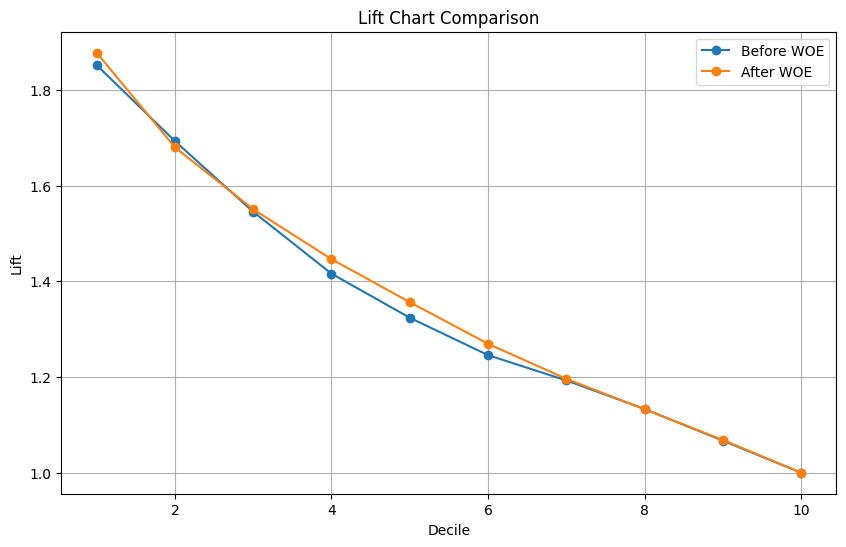

In [61]:
def plot_combined_lift_chart(y_test, y_pred_proba, y_pred_proba_woe, model_name1, model_name2):
    # Create gains table for both models
    gains_table_model1 = create_gains_table(y_test, y_pred_proba)
    gains_table_model2 = create_gains_table(y_test, y_pred_proba_woe)
    
    # Calculate lift for both models
    gains_table_model1['Lift'] = gains_table_model1['Cumulative_Percentage'] / (gains_table_model1['Decile'] * 10)
    gains_table_model2['Lift'] = gains_table_model2['Cumulative_Percentage'] / (gains_table_model2['Decile'] * 10)
    
    # Plot the combined lift chart
    plt.figure(figsize=(10, 6))
    plt.plot(gains_table_model1['Decile'], gains_table_model1['Lift'], marker='o', label=model_name1)
    plt.plot(gains_table_model2['Decile'], gains_table_model2['Lift'], marker='o', label=model_name2)
    plt.title('Lift Chart Comparison')
    plt.xlabel('Decile')
    plt.ylabel('Lift')
    plt.grid()
    plt.legend()
    plt.show()

# Plot combined lift chart for both models
plot_combined_lift_chart(Y_test, pred_proba, pred_proba_woe, "Before WOE", "After WOE")


### Lift Chart Takeaways

#### Comparing Lift Before and After WOE Transformation
The lift chart compares the model performance before and after applying Weight-of-Evidence (WOE) transformation across different deciles. Each decile represents 10% of the data ranked by the predicted probability of default. The following are key observations:

- **Improved Lift in Top Deciles**: The model trained on WOE-transformed variables ("After WOE") consistently shows higher lift in the top deciles compared to the non-WOE model ("Before WOE"). This suggests that the WOE transformation allows the model to concentrate defaults more effectively in the top-ranked groups.
  
- **First Decile Performance**: The lift is highest in the first decile for both models, indicating that both models are able to rank high-risk defaults effectively. However, the lift for the WOE model is slightly higher in this decile, suggesting a better differentiation of high-risk defaults.

- **Consistent Advantage Across Deciles**: Throughout the first half of the deciles (Decile 1 to Decile 5), the WOE-transformed model demonstrates a consistent advantage over the non-WOE model, maintaining higher lift values. This shows that the WOE transformation has improved the model’s ability to identify likely defaulters early on.

- **Convergence in Lower Deciles**: As the decile rank increases (Decile 6 to Decile 10), the lift values for both models converge towards `1`. This is expected as the lower deciles contain less likely defaulters, making it more challenging for any model to add predictive value over random selection.

#### Conclusion
The lift chart shows that the WOE-transformed model provides a noticeable improvement in identifying defaults within the top deciles compared to the non-WOE model. The higher lift in the top deciles confirms that the WOE transformation enhances the model’s discriminatory power, making it more effective in concentrating defaults in the highest probability groups.


## 5.3 ROC Curve Analysis

### Understanding the ROC Curve
The Receiver Operating Characteristic (ROC) curve is a graphical representation of the model's ability to distinguish between positive and negative classes—in this case, defaults and non-defaults. It plots the **True Positive Rate (TPR)** against the **False Positive Rate (FPR)** at various classification thresholds.

- **True Positive Rate (Sensitivity)**: Measures the proportion of actual defaults correctly identified by the model.
- **False Positive Rate**: Measures the proportion of non-defaults incorrectly classified as defaults.

The area under the ROC curve, known as **AUC (Area Under Curve)**, is a summary measure of the model's discriminatory power. An AUC of `1.0` indicates perfect classification, while an AUC of `0.5` indicates performance equivalent to random guessing.

### Comparing ROC Curves (Before and After WOE)
The ROC curves for both the non-WOE and WOE-transformed models are plotted to compare their performance:

- **AUC Comparison**: The AUC for the model before WOE is `0.6472`, while the AUC for the WOE-transformed model is `0.6520`. The higher AUC for the WOE model suggests an improved ability to discriminate between defaults and non-defaults.
  
- **ROC Curve Shape**: A steeper ROC curve, particularly near the top-left corner of the plot, indicates better performance. The ROC curve for the WOE-transformed model tends to be slightly closer to the top-left corner compared to the non-WOE model, indicating an improvement in true positive rates at various thresholds.

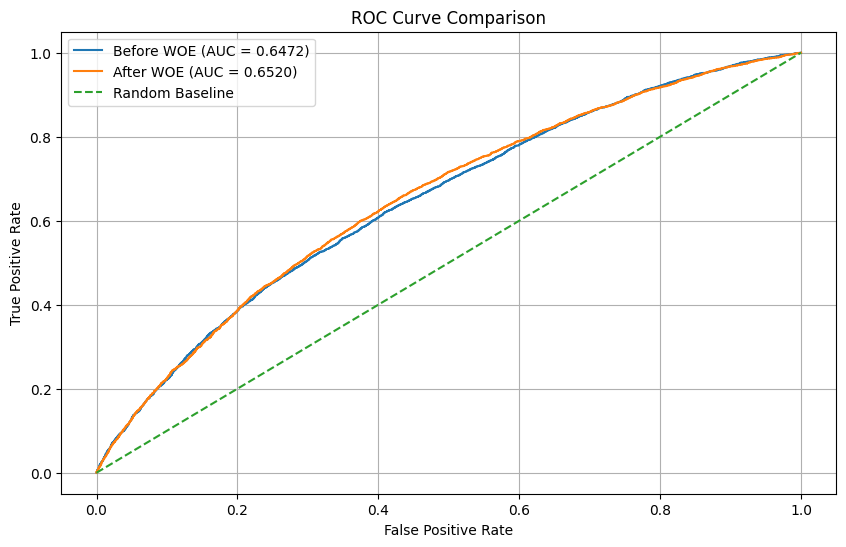

In [62]:
from sklearn.metrics import roc_curve, auc

def plot_combined_roc_curve(y_test, y_pred_proba, y_pred_proba_woe, model_name1, model_name2):
    # Calculate ROC curve and AUC for both models
    fpr1, tpr1, _ = roc_curve(y_test, y_pred_proba)
    roc_auc1 = auc(fpr1, tpr1)
    
    fpr2, tpr2, _ = roc_curve(y_test, y_pred_proba_woe)
    roc_auc2 = auc(fpr2, tpr2)
    
    # Plot the combined ROC curve
    plt.figure(figsize=(10, 6))
    plt.plot(fpr1, tpr1, label=f'{model_name1} (AUC = {roc_auc1:.4f})')
    plt.plot(fpr2, tpr2, label=f'{model_name2} (AUC = {roc_auc2:.4f})')
    plt.plot([0, 1], [0, 1], linestyle='--', label='Random Baseline')
    plt.title('ROC Curve Comparison')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.grid()
    plt.legend()
    plt.show()

# Plot combined ROC curve for both models
plot_combined_roc_curve(Y_test, pred_proba, pred_proba_woe, "Before WOE", "After WOE")


### ROC Curve Takeaways

- **AUC Improvement**: The model trained on WOE-transformed variables ("After WOE") shows an AUC of `0.6520`, which is higher than the AUC of `0.6472` for the non-WOE model ("Before WOE"). This improvement suggests that the WOE transformation has enhanced the model's ability to correctly classify defaults and non-defaults.

- **Separation of Curves**: The ROC curve for the WOE model is consistently above the ROC curve for the non-WOE model, particularly in the earlier sections of the curve. This indicates that the WOE-transformed model has a better true positive rate (sensitivity) at most false positive rates.

- **Closer to the Top-Left Corner**: The "After WOE" curve is closer to the top-left corner compared to the "Before WOE" curve. A curve closer to the top-left corner signifies better model performance, as it indicates a higher true positive rate for a lower false positive rate.

- **Comparison to Random Baseline**: Both models perform better than the random baseline (the diagonal dashed line), as expected. However, the WOE-transformed model demonstrates superior performance over the non-WOE model across most thresholds.

#### Practical Insight
The slight increase in AUC from `0.6472` to `0.6520` demonstrates that the WOE transformation provides some improvement in the model's discriminatory power. The WOE-transformed model is better at distinguishing between defaults and non-defaults, which is valuable in practical applications such as risk assessment and decision-making.

#### Conclusion
The ROC curve and AUC values confirm that the WOE transformation enhances the logistic regression model's performance. Although the increase in AUC is modest, the improvement in the model's ability to distinguish between classes reinforces the benefits of applying WOE encoding to predictor variables.
